# Basic setup

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import glob
import nibabel as nib
from nltools.data import Brain_Data
from nltools.analysis import Roc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from copy import deepcopy
from nltools.utils import get_resource_path
from nltools.file_reader import onsets_to_dm
from nltools.data import Design_Matrix
from nltools.mask import create_sphere
from nltools.mask import expand_mask, collapse_mask
from nltools.data import Adjacency
from scipy.spatial.distance import pdist
from scipy.stats import pearsonr
from scipy import stats
import seaborn as sns
from nltools.stats import correlation_permutation
from scipy.stats import spearmanr
from scipy.spatial import distance
from nltools.stats import matrix_permutation
from nltools.stats import fdr
from scipy.spatial.distance import squareform
from nltools.plotting import plot_brain
from nltools.data import Adjacency
from scipy.stats import rankdata
# from mlxtend.evaluate import permutation_test

# define data repository
dpath = 'where/the/preprocessed/data/is'
fpath = '//Users/chihyin33/Python_at_all/tutorials/affective_ISRSA-master'

/Users/chihyin33/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


## Loading Brain masks from Neurovault - 100 ROIs

In [2]:
mask100 = Brain_Data('http://neurovault.org/media/images/2099/Neurosynth%20Parcellation_1.nii.gz')
allmask100 = expand_mask(mask100)

In [3]:
allmask100

nltools.data.brain_data.Brain_Data(data=(100, 238955), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

# Calculating intersubject similarity of brain dynamics with 100-ROI parcellation

## Erotic movie-watching condition

In [ ]:
# # for erotic movie watching condition
# subs = np.zeros((26, 84, allmask100.shape()[0]))

# for s,name in enumerate(names):
    
#     dat = Brain_Data(os.path.join(dpath,'porn_data_new',str(name)+'_porn_bold.nii.gz'))
#     print("Loading subject %s ... " % name)
#     print("Extracting time-series")
    
#     for i, ma in enumerate(allmask100):
#         subs[s,:,i] = dat.extract_roi(ma)
        
#     print("Converting to mats...")
#     adj = Adjacency()
#     for i in range(subs.shape[-1]):
#         adj = adj.append(Adjacency(1 - pdist(subs[:,:,i],metric='correlation')))
#     adj.write(os.path.join(fpath,'isc_new','porn_100rois_isc_26subj.csv'))

# #Then transpose porn_100rois_isc_26subj.csv before the next step

## Neutral movie-watching condition

In [ ]:
# # for erotic movie watching condition
# subs = np.zeros((26, 84, allmask100.shape()[0]))

# for s,name in enumerate(names):
    
#     dat = Brain_Data(os.path.join(dpath,'neutral_data_new',str(name)+'_neutral_bold.nii.gz'))
#     print("Loading subject %s ... " % name)
#     print("Extracting time-series")
    
#     for i, ma in enumerate(allmask100):
#         subs[s,:,i] = dat.extract_roi(ma)
        
#     print("Converting to mats...")
#     adj = Adjacency()
#     for i in range(subs.shape[-1]):
#         adj = adj.append(Adjacency(1 - pdist(subs[:,:,i],metric='correlation')))
#     adj.write(os.path.join(fpath,'isc_new','neutral_100rois_isc_26subj.csv'))

# #Then transpose porn_100rois_isc_26subj.csv before the next step

## Conventional ISC for the erotic and neutral movie

In [4]:
neutraldata_100rois = pd.read_csv(os.path.join(fpath,'data','neural','neutral_100rois_isc_transpose_26subj.csv'))
porndata_100rois = pd.read_csv(os.path.join(fpath,'data','neural','porn_100rois_isc_transpose_26subj.csv'))

In [7]:
eroticmean = []
neutralmean = []

for i in range(1,101):
    r1 = porndata_100rois[f'ROI{i}'].mean()
    eroticmean.append(r1)
    r2 = neutraldata_100rois['ROI%i' %(i)].mean()
    neutralmean.append(r2)

# r1: mean value of each ROI in the context of watching erotic clips
# Thus it generates 100 mean values(which also can be represented as lower triangles) 
# for neural similarity in watching erotic clips

In [10]:
r1  # random one

0.10272159968000003

In [11]:
eroticmean

[0.14624005160615386,
 0.09606311723692304,
 0.0889570492492308,
 0.041261156621538495,
 0.04931560332923081,
 0.27817902338461553,
 0.26727550960615376,
 0.2210314439815386,
 0.06233180591692302,
 0.27453440021230774,
 0.0997998447661538,
 0.3140440376769232,
 0.07424249234153844,
 0.07136729415384617,
 0.026382513639999983,
 0.1510229770276922,
 0.05099534152923078,
 0.19450007296923078,
 0.1226103424984616,
 0.04529143198769231,
 0.059101120116923075,
 0.021106172781538465,
 0.07550056762769232,
 0.13779328236307695,
 0.032326039369230765,
 0.0629401293230769,
 0.12909608996307687,
 0.019778729701538482,
 0.0763723478676924,
 0.1215761553630769,
 0.2591270563138461,
 0.18318573712615388,
 0.09637563758769227,
 0.10600294696000001,
 0.10490673095076926,
 0.1071463857200001,
 0.27565604198153865,
 0.036006029916923074,
 0.1225748005661539,
 0.07331866209538465,
 0.044680857224615386,
 0.03939380040615384,
 0.10893188007999999,
 0.052979634969230735,
 0.07835741824307688,
 0.0684334260

In [13]:
e_ISC = pd.Series(eroticmean)
n_ISC = pd.Series(neutralmean)
ISCdata = pd.DataFrame({'erotic average ISC':e_ISC, 'neutral average ISC':n_ISC})

print('Average ISC for Neutral movie is:', ISCdata['neutral average ISC'].mean())
print('Average ISC for Erotic movie is:', ISCdata['erotic average ISC'].mean())

Average ISC for Neutral movie is: 0.07535928076058461
Average ISC for Erotic movie is: 0.10821004726698465


In [14]:
ISCdata

erotic average ISC  neutral average ISC
0             0.146240             0.089300
1             0.096063             0.048973
2             0.088957             0.034044
3             0.041261             0.034170
4             0.049316             0.008912
..                 ...                  ...
95            0.097970             0.036765
96            0.101208             0.094024
97            0.099387             0.033325
98            0.183753             0.118480
99            0.102722             0.057014

[100 rows x 2 columns]

In [17]:
#p_val = permutation_test(ISCdata['neutral average ISC'], ISCdata['erotic average ISC'],
#                        method='approximate',
#                       num_rounds = 10000,
#                        seed=0)
#print (p_val)

### Figure 3C

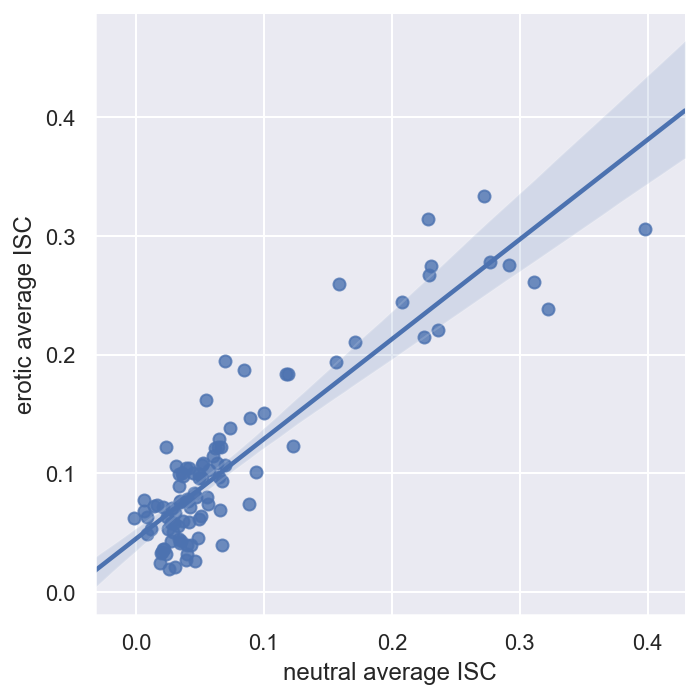

In [16]:
sns.set(color_codes=True)
sns.lmplot(x = 'neutral average ISC',y='erotic average ISC',data=ISCdata)

In [17]:
pearsonr(eroticmean,neutralmean)

(0.8962453875329709, 2.2538775694711435e-36)

### Figure 3A

In [20]:
erotic_ISC_mean_value = ISCdata['erotic average ISC'].values

erotic_ISC_mean = mask100.copy() #238955 voxles
erotic_ISC_mean.data = np.array([x.data*y for (x,y) in zip(allmask100,erotic_ISC_mean_value)])
#expand_mask: 0/1
erotic_ISC_mean = erotic_ISC_mean.sum() #how to do the partition of ROIs?

Plotting unthresholded image


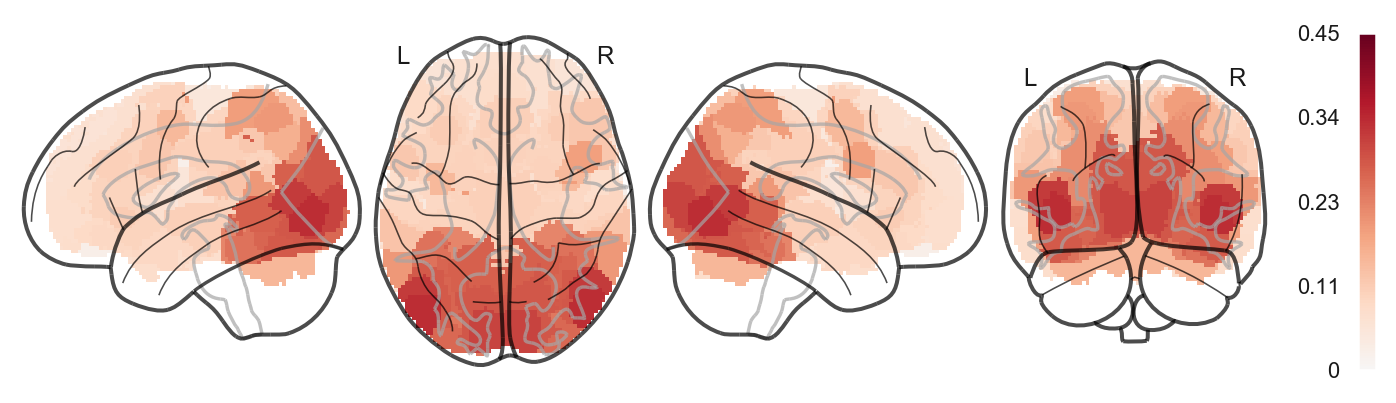

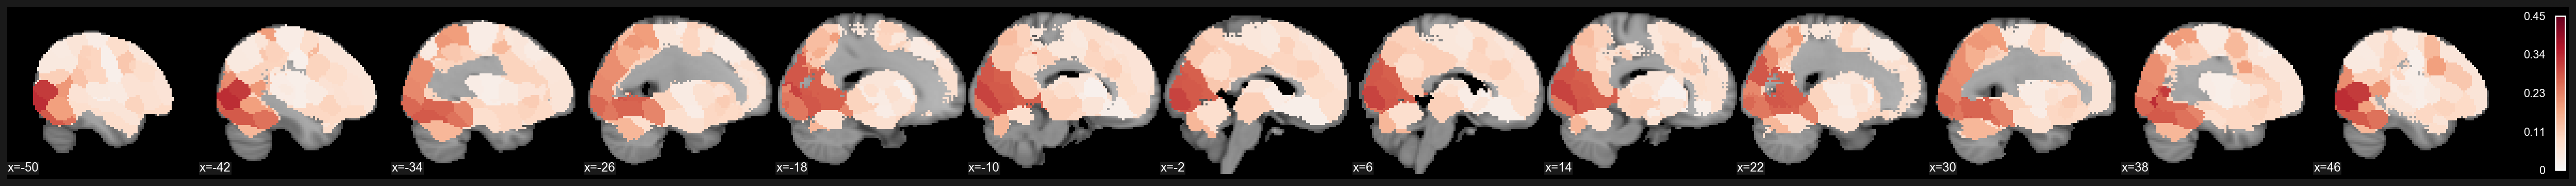

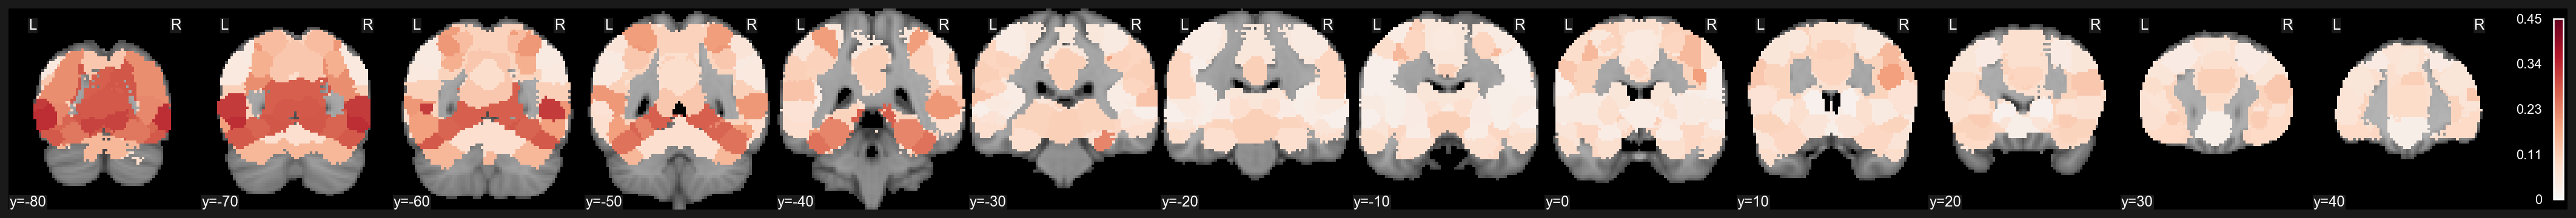

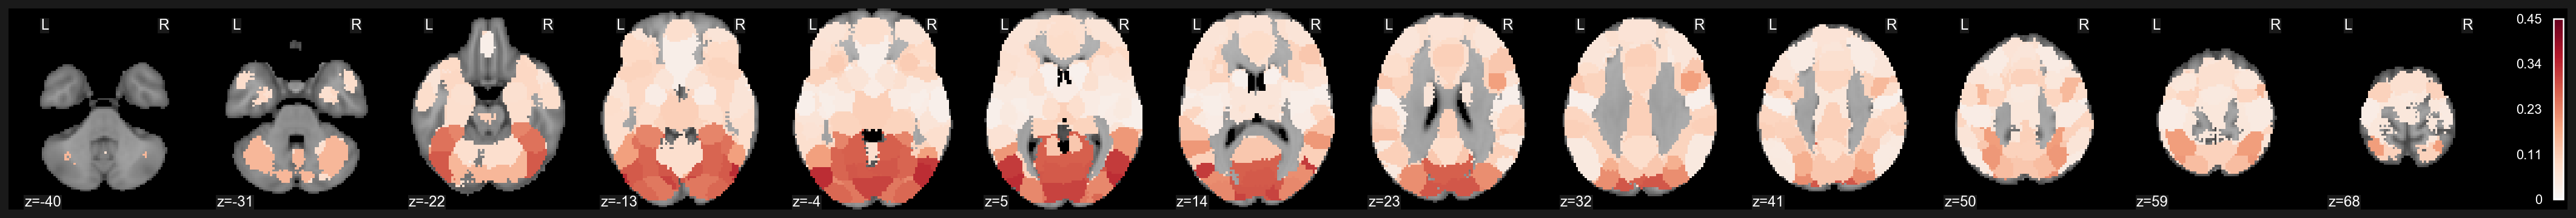

In [21]:
plot_brain(erotic_ISC_mean,**{'vmax':0.45})
#the color bar doesn't mean 'the degree', otherwise indicates the same region

### Figure 3B

In [18]:
neutral_ISC_mean_value = ISCdata['neutral average ISC'].values

neutral_ISC_mean = mask100.copy()
neutral_ISC_mean.data = np.array([x.data*y for (x,y) in zip(allmask100,neutral_ISC_mean_value)])
neutral_ISC_mean = neutral_ISC_mean.sum()

Plotting unthresholded image


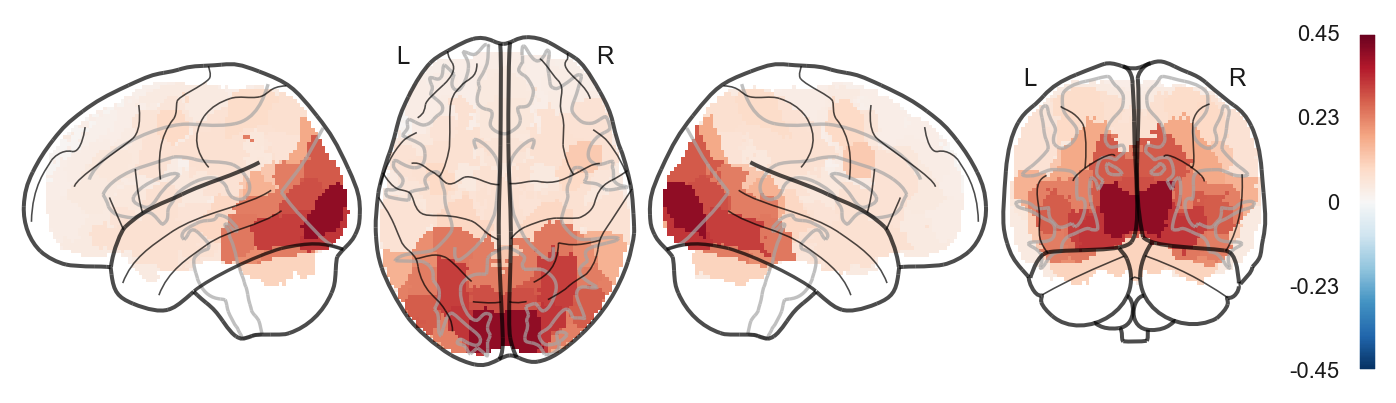

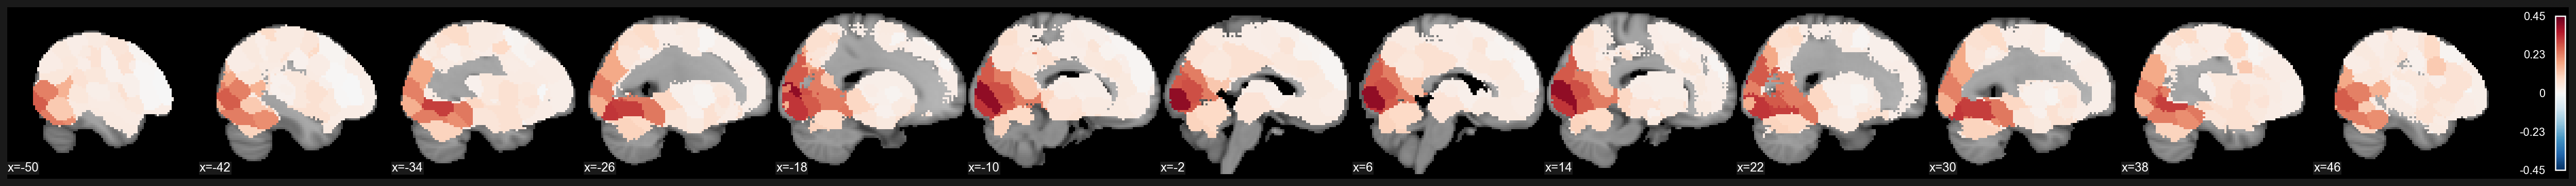

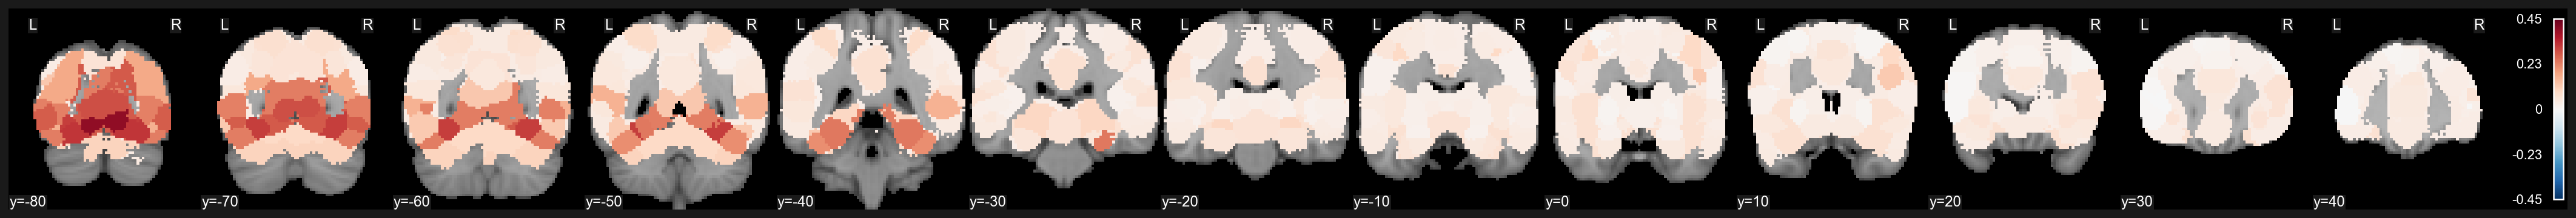

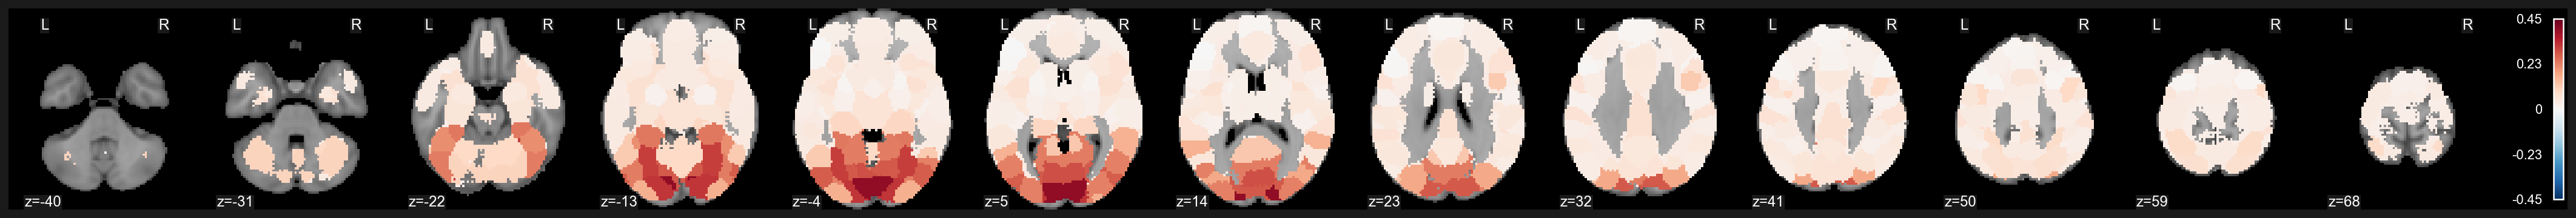

In [19]:
plot_brain(neutral_ISC_mean,**{'vmax':0.45})

# Calculating intersubject similarity of the multidimensional behavioral preferences

## Intersubject similarity in sociosexual desire preference
* 9 items in SOI
* 14 items in SDI
* normalized the scale of each item to fall between 0-1 

In [45]:
# compute correlation distance
desire_scale_normalize_raw = pd.read_csv(os.path.join(fpath,'Data','Behavior','desire_scale_26subj_normalize.csv'))
desire_scale_normalize = pdist(desire_scale_normalize_raw,metric='correlation')

# correlation: 1-correlaiton distance 
desire_scale_normalize_r = 1 - desire_scale_normalize
desire_scale_normalize_cor = pd.DataFrame(desire_scale_normalize_r,columns= ["desire_scale_normalize_cor"])

In [46]:
desire_sum = pd.read_csv(os.path.join(fpath,'Data','Behavior','desire_scale_sum.csv'))

desire_scale_normalize_adj = Adjacency(desire_scale_normalize, matrix_type='distance_flat'
                                       , labels=[str(i) for i in range(1,27)])

In [43]:
# # plotting the bar color scale
# colors = sns.color_palette('Reds', n_colors=140)
# ccc = [colors[x] for x in desire_sum['sum'].values]
# sns.palplot(colors)

### Figure 5A

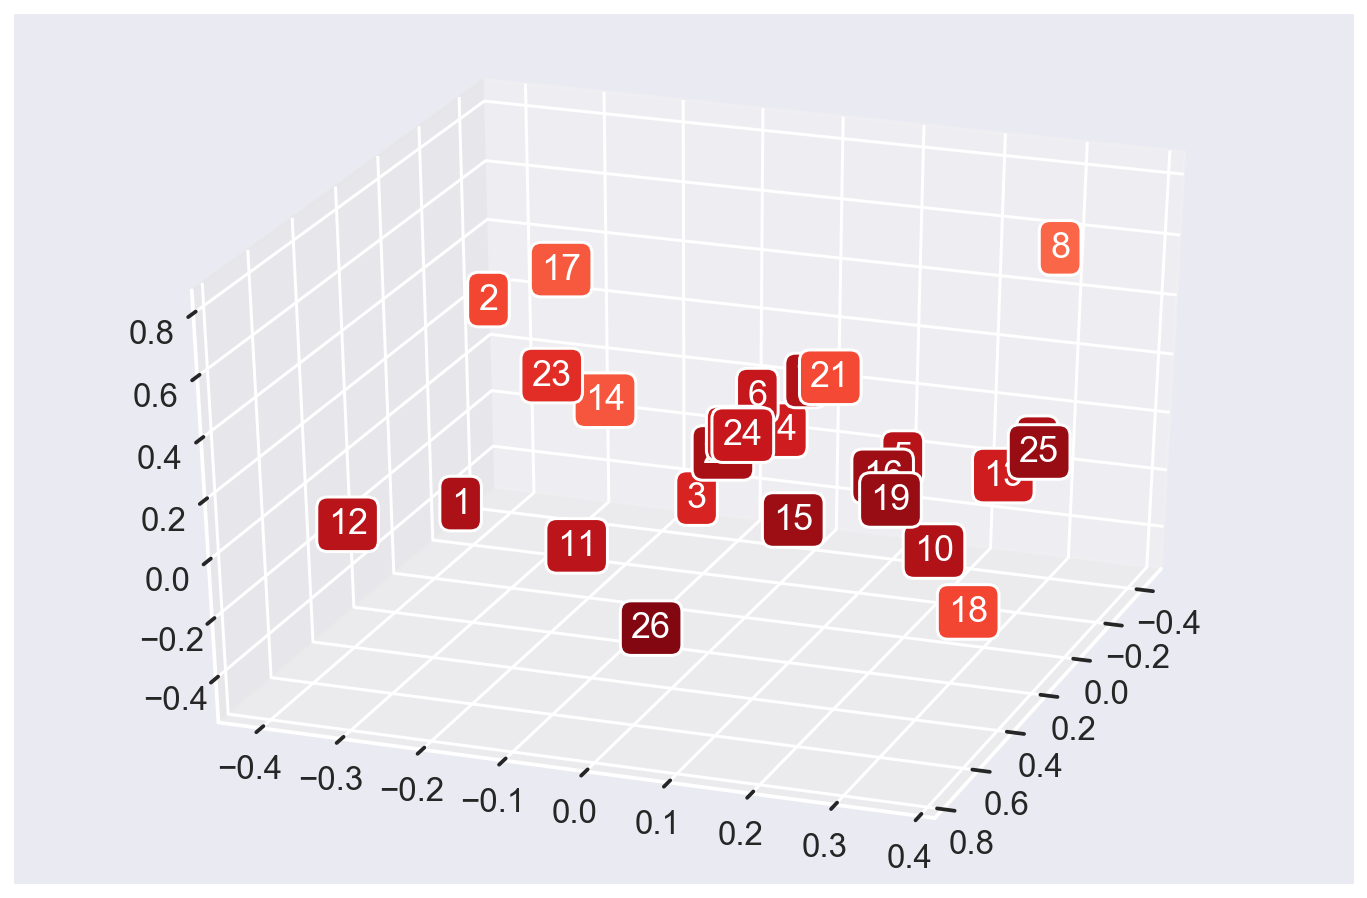

In [47]:
# %matplotlib notebook
# passing desire total score as label color in the figure
sns.set_context('talk',font_scale=1)
colors = sns.color_palette('Reds', n_colors=140)
ccc = [colors[x] for x in desire_sum['sum'].values]
g = desire_scale_normalize_adj.plot_mds(n_components=3,labels_color=ccc)

### Figure 5C
* plotting the relationship between univariate desire score and multidimensional desire similairy

In [48]:
desire_scale_normalize_raw = pd.read_csv(os.path.join(fpath,'Data','Behavior','desire_scale_26subj_normalize.csv'))
desire_sum = pd.read_csv(os.path.join(fpath,'Data','Behavior','desire_scale_sum.csv'))

desire_sum_absdist = pdist(desire_sum['sum'][:, np.newaxis])
desire_scale_normalize = pdist(desire_scale_normalize_raw,metric='correlation')

desire_distance_dat = pd.DataFrame(desire_sum_absdist)
desire_distance_dat.columns=['desire absolute distance']
desire_distance_dat['desire correlation distance'] = desire_scale_normalize

In [49]:
matrix_permutation(desire_distance_dat['desire correlation distance'],
        desire_distance_dat['desire absolute distance'],n_permute=10000, 
        metric='spearman',tail=2, random_state=None)

{'correlation': 0.2952019288673455, 'p': 0.0008999100089991}

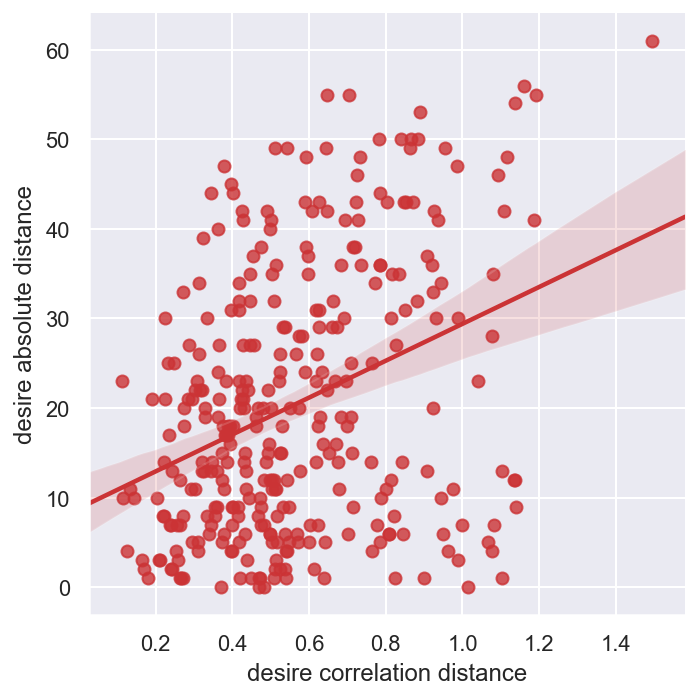

In [50]:
sns.set(color_codes=True)
sns.set_palette("Set1", 8, .75)
sns.lmplot(x='desire correlation distance',y='desire absolute distance',data=desire_distance_dat)

### Figure 2A(2) and 2B lower triangle

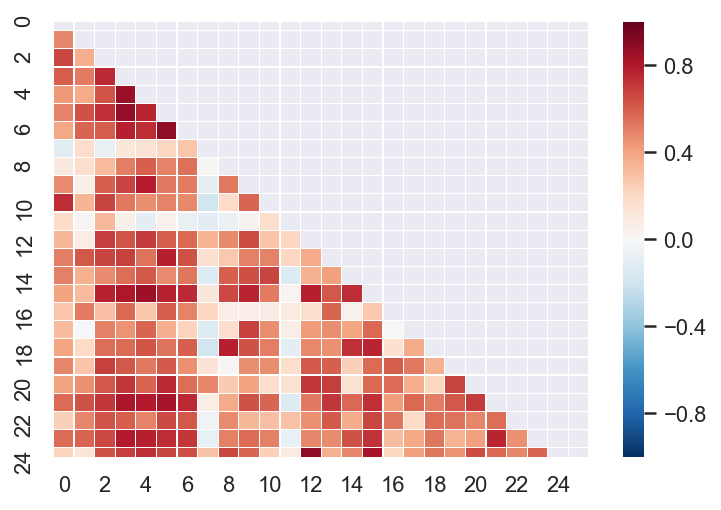

In [52]:
desire_scale_normalize_cor_square = distance.squareform(desire_scale_normalize_cor['desire_scale_normalize_cor'])

mask =np.zeros_like(desire_scale_normalize_cor_square)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(desire_scale_normalize_cor_square, vmin=-1,vmax=1, mask=mask,linewidths=0.1, cmap = 'RdBu_r')

## Intersubject similarity in self-control preference
* 13 items in short-version self-control scale
* 4 measurments in the Go/Nogo task: Hit and correct rejection rate for attractive and unattractive categories
* normalize the self-control scale score to be between 0-1

In [53]:
# compute correlation distance
control_short_gonogo_raw = pd.read_csv(os.path.join(fpath,'Data','Behavior','control_short_and_gonogo_normalized.csv'))
control_short_gonogo = pdist(control_short_gonogo_raw,metric='correlation')

# correlation: 1-correlaiton distance 
control_short_gonogo_r = 1 - control_short_gonogo
control_short_gonogo_cor = pd.DataFrame(control_short_gonogo_r,columns= ["control_short_gonogo_cor"])

### pass self-control total score as label color in the figure

In [56]:
control_sum = pd.read_csv(os.path.join(fpath,'Data','Behavior','control_short_sum.csv'))
control_scale_normalize_adj = Adjacency(control_short_gonogo, matrix_type='distance_flat'
                                       , labels=[str(i) for i in range(1,27)])

colors = sns.color_palette('Blues', n_colors=60)
cccc = [colors[x] for x in control_sum['sum'].values]

In [59]:
# # plotting the bar color scale
# colors = sns.color_palette('Blues', n_colors=60)
# cccc = [colors[x] for x in control_sum['sum'].values]
# sns.palplot(colors)

### Figure 5B

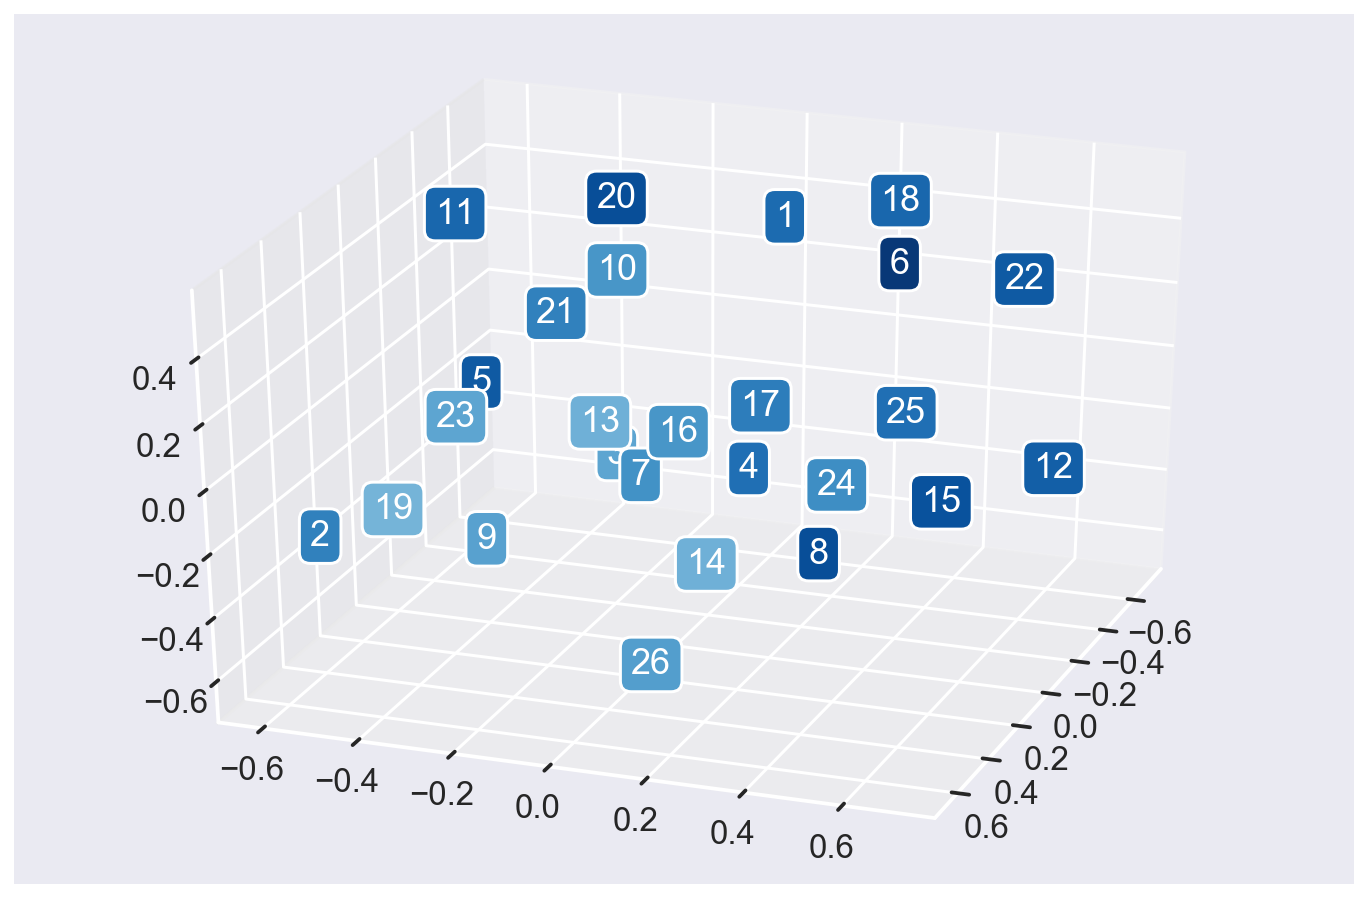

In [60]:
# %matplotlib notebook
sns.set_context('talk',font_scale=1)
g = control_scale_normalize_adj.plot_mds(n_components=3,labels_color=cccc)

### Figure 5D
* plotting the relationship between univariate self-control score and multidimensional self-control similairy

In [61]:
control_short_gonogo_raw = pd.read_csv(os.path.join(fpath,'Data','Behavior','control_short_and_gonogo_normalized.csv'))

control_sum = pd.read_csv(os.path.join(fpath,'Data','Behavior','control_short_sum.csv'))
control_sum_absdist = pdist(control_sum['sum'][:, np.newaxis])

control_short_gonogo = pdist(control_short_gonogo_raw,metric='correlation')

control_distance_dat = pd.DataFrame(control_sum_absdist)
control_distance_dat.columns=['self-control absolute distance']
control_distance_dat['self-control correlation distance'] = control_short_gonogo

In [62]:
matrix_permutation(control_distance_dat['self-control correlation distance'],
        control_distance_dat['self-control absolute distance'],n_permute=10000, 
        metric='spearman',tail=2, random_state=None)

{'correlation': 0.300509701778519, 'p': 0.00019998000199980003}

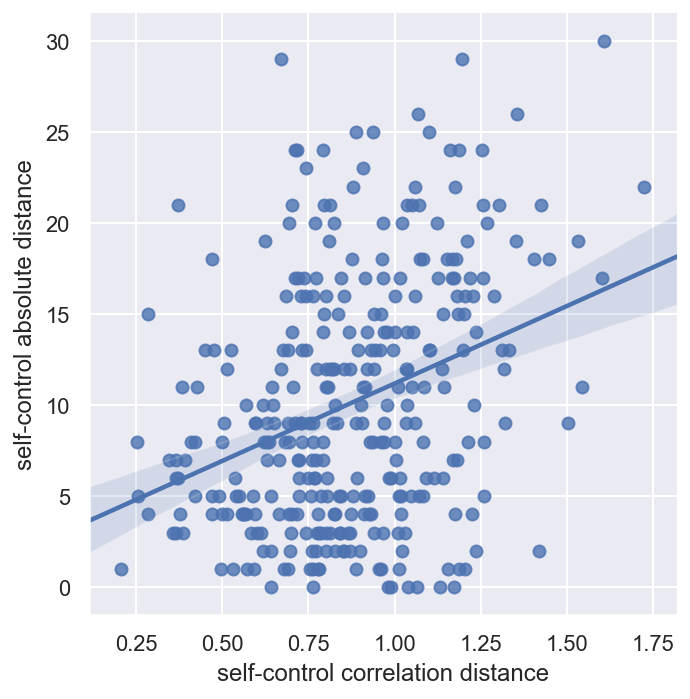

In [64]:
sns.set(color_codes=True)

sns.lmplot(x='self-control correlation distance',y='self-control absolute distance'
           ,data=control_distance_dat)

### Figure 2C: lower triangle

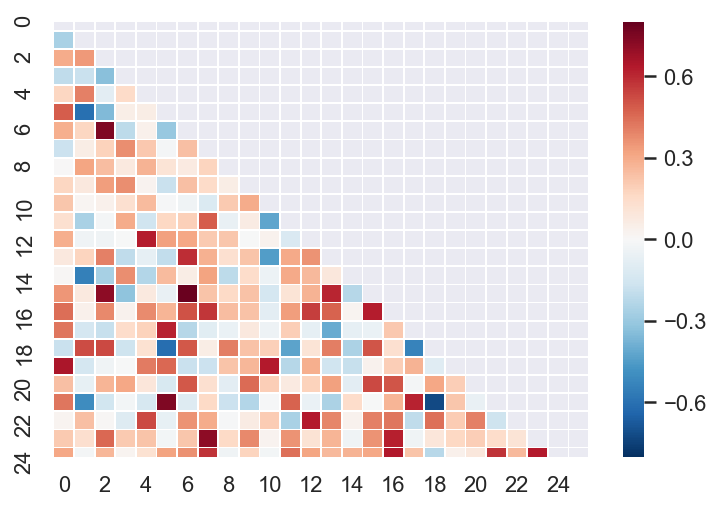

In [67]:
control_short_gonogo_cor_square = distance.squareform(control_short_gonogo_cor['control_short_gonogo_cor'])

mask =np.zeros_like(control_short_gonogo_cor_square)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(control_short_gonogo_cor_square, vmin=-0.8,vmax=0.8, mask=mask, linewidths=0.4, cmap = 'RdBu_r')

# ISRSA between erotic movie and sociosexual desire preference

In [71]:
porndata_100rois = pd.read_csv(os.path.join(fpath,'isc_new','porn_100rois_isc_transpose_26subj.csv'))
porndata_100rois['desire_scale_normalize_cor'] = desire_scale_normalize_cor

## Mantel test

In [ ]:
porn_desire_normalize_r_cor_rvals100_1tail = []
porn_desire_normalize_r_cor_pvals100_1tail = []

# in the 100rois_isc csv file, ROI number starts from 1
# in other files, ROI number starts from 0
for i in range(0,100):
    r = matrix_permutation(porndata_100rois['ROI'+str(i+1)],porndata_100rois['desire_scale_normalize_cor'],
        n_permute=10000, metric='spearman',tail=1, random_state=None, n_jobs=5)
    print("for ROI %s, the correlation is %s " % (i+1, r))
    porn_desire_normalize_r_cor_rvals100_1tail.append(r['correlation'])
    porn_desire_normalize_r_cor_pvals100_1tail.append(r['p'])

In [10]:
porn_desire_normalize_r_cor_rvals100_1tail = np.array(porn_desire_normalize_r_cor_rvals100_1tail)
mask = porn_desire_normalize_r_cor_rvals100_1tail < 0
p = np.array(porn_desire_normalize_r_cor_pvals100_1tail)
p[mask] = 1 - p[mask]
fdr(p, q=0.05)

In [13]:
porn_desire_normalize_r_cor_rvals100_1tail = pd.DataFrame(porn_desire_normalize_r_cor_rvals100_1tail)
porn_desire_normalize_r_cor_rvals100_1tail.columns=['rvals']
porn_desire_normalize_r_cor_rvals100_1tail.to_csv(os.path.join(fpath,'results_new'
                                                 ,'rvals100_porn_desire_cor_new.csv'))

porn_desire_normalize_r_cor_pvals100_1tail = pd.DataFrame(porn_desire_normalize_r_cor_pvals100_1tail)
porn_desire_normalize_r_cor_pvals100_1tail.columns=['pvals']
porn_desire_normalize_r_cor_pvals100_1tail.to_csv(os.path.join(fpath,'results_new',
                                                'pvals100_porn_desire_cor_new.csv'))

### Figure 4A
* whole-brain IS-RSA similarity map

In [73]:
porn_desire_cor_all_result = pd.read_csv(os.path.join(fpath,'results_new','porn_desire_cor_threshold.csv'))

Plotting unthresholded image


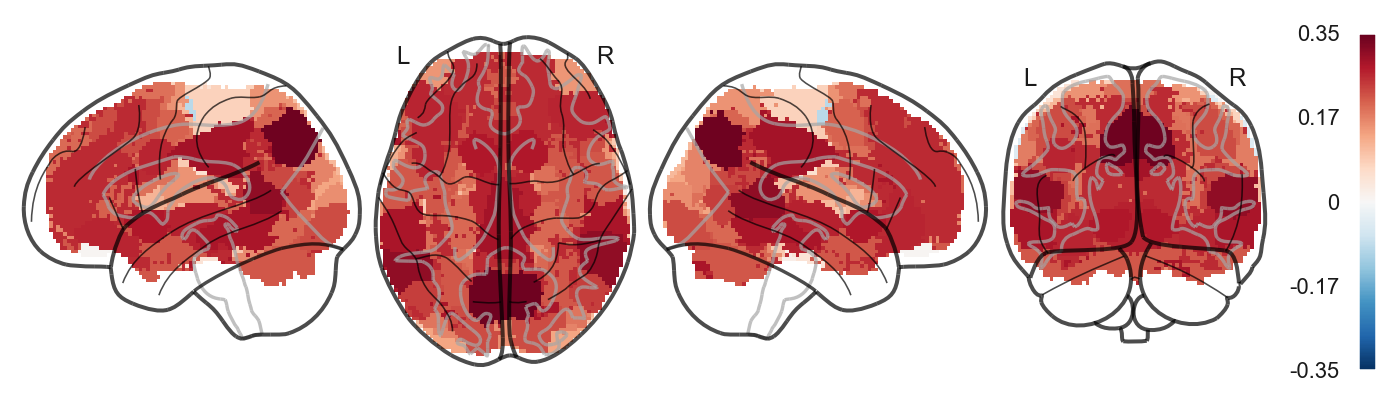

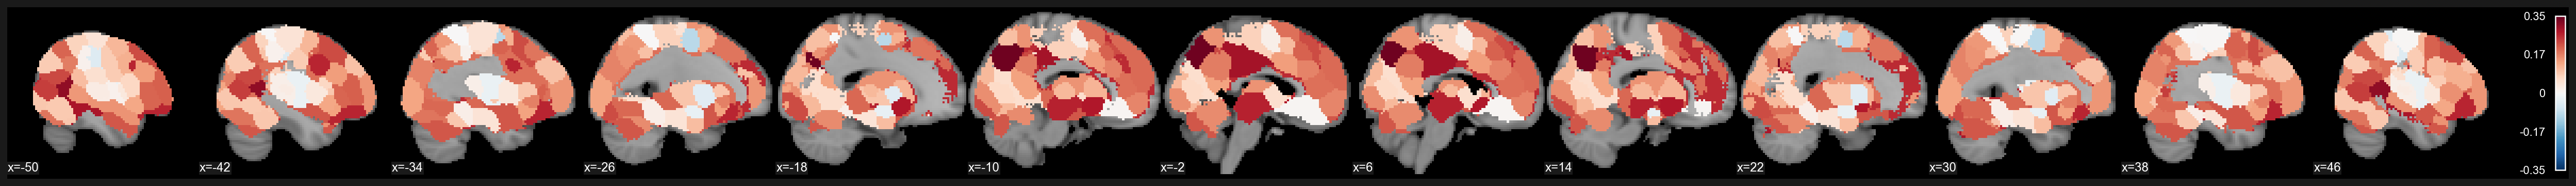

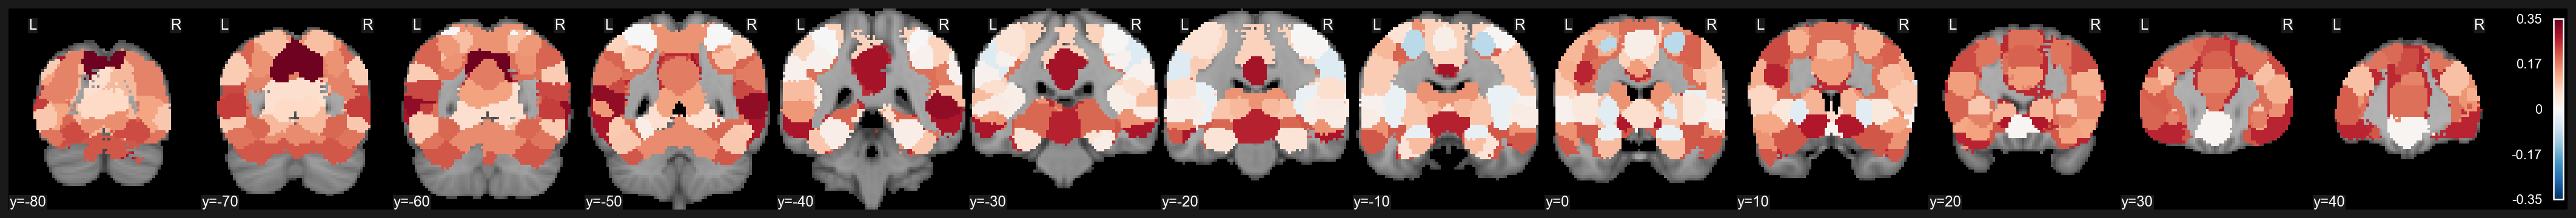

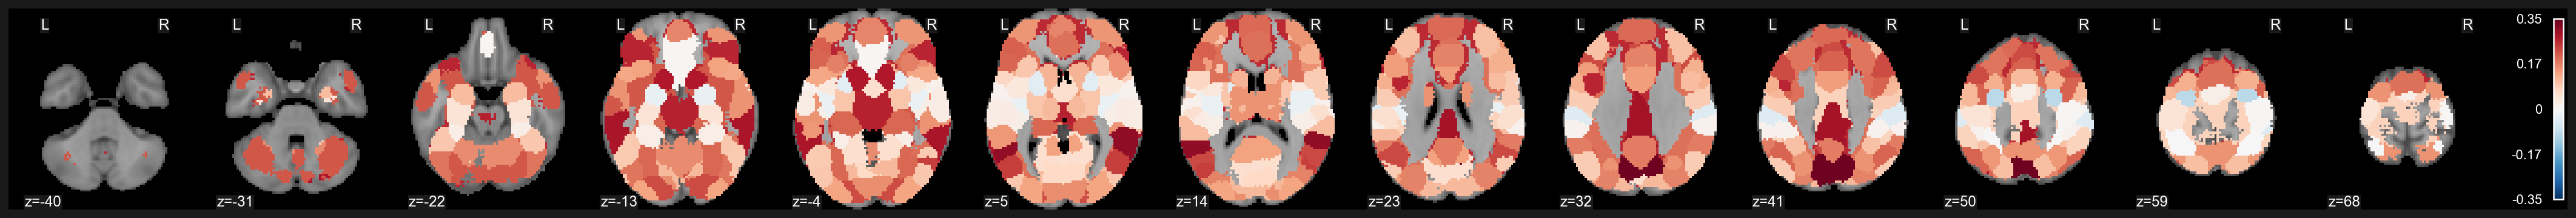

In [74]:
porn_desire_all_cor_rvals = porn_desire_cor_all_result['rvals'].values

porn_desire_cor_matrix = mask100.copy()
porn_desire_cor_matrix.data = np.array([x.data*y for (x,y) in zip(allmask100,porn_desire_all_cor_rvals)])
porn_desire_cor_matrix = porn_desire_cor_matrix.sum()

plot_brain(porn_desire_cor_matrix,**{'vmax':0.35})

In [75]:
# output brainmap
porn_desire_cor_matrix.write(os.path.join(fpath,'brainmap','erotic_desire_isrsa_wholebrain.nii.gz'))

### Figure 6A
* thersholded IS-RSA map

Plotting unthresholded image


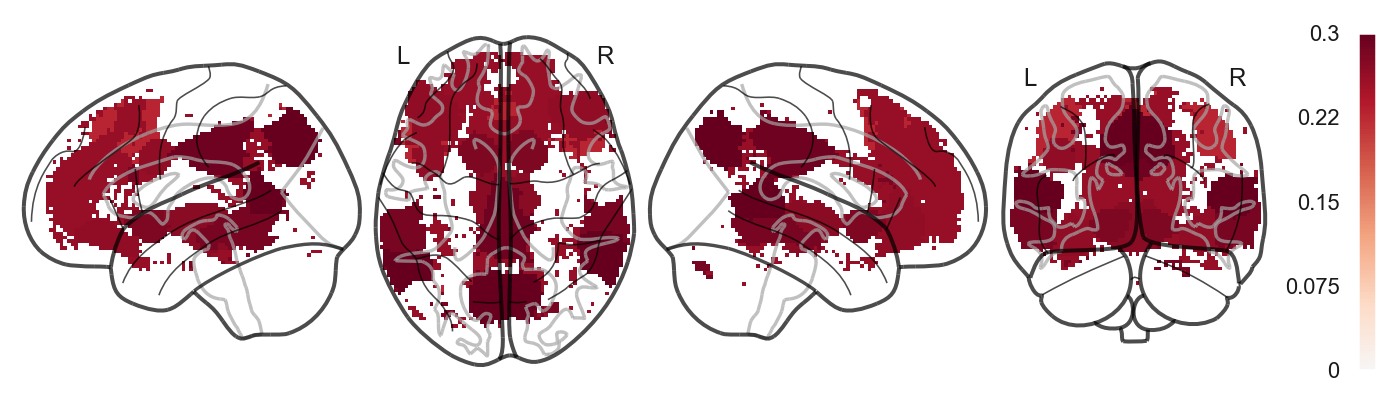

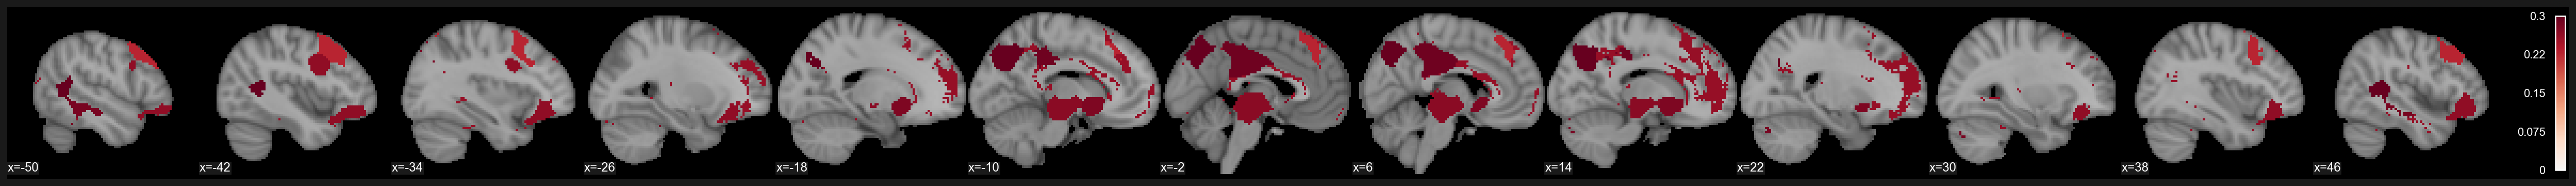

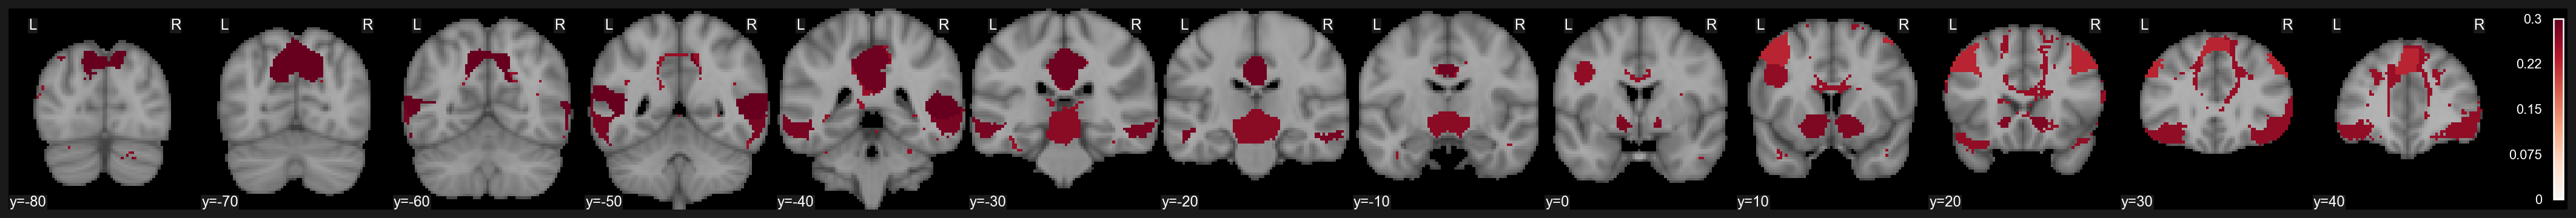

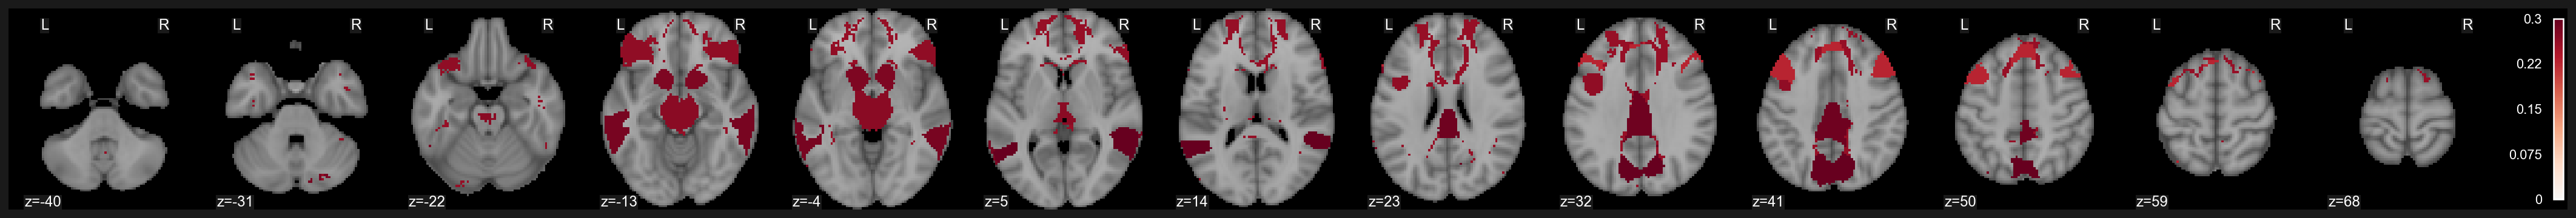

In [76]:
porn_desire_all_cor_rvals_q05 = porn_desire_cor_all_result['matrixpermute_rvals'].values

porn_desire_cor_matrix_q05 = mask100.copy()
porn_desire_cor_matrix_q05.data = np.array([x.data*y for (x,y) in zip(allmask100,porn_desire_all_cor_rvals_q05)])
porn_desire_cor_matrix_q05 = porn_desire_cor_matrix_q05.sum()

plot_brain(porn_desire_cor_matrix_q05, **{'vmax':0.30})

In [77]:
# output brainmap
porn_desire_cor_matrix_q05.write(os.path.join(fpath,'brainmap','erotic_desire_isrsa_thresholded.nii.gz'))

### Figure 2A(1) and 2B upper triangle
* in allmask100, ROI35 -> pcc 

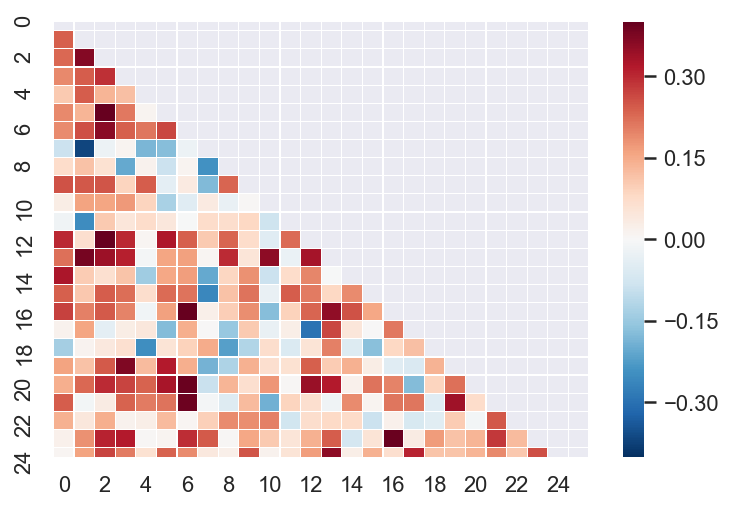

In [83]:
# plot PCC intersubject similarity
# porndata_100rois['ROI36'] = allmask[35]
porn_roi35 = distance.squareform(porndata_100rois['ROI36'])

mask =np.zeros_like(porn_roi35)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(porn_roi35, vmin=-0.4,vmax=0.4, mask=mask,linewidths=0.1,cmap = 'RdBu_r')

# ISRSA between erotic movie and self-control preference

In [84]:
porndata_100rois = pd.read_csv(os.path.join(fpath,'isc_new','porn_100rois_isc_transpose_26subj.csv'))
porndata_100rois['control_short_gonogo_cor'] = control_short_gonogo_cor

## Mantel test

In [ ]:
porn_gonogo_control_rvals100_1tail = []
porn_gonogo_control_pvals100_1tail = []

# in the 100rois_isc csv file, ROI number starts from 1
# in other files, ROI number starts from 0
for i in range(0,100):
    r = matrix_permutation(porndata_100rois['ROI'+str(i+1)]
        ,porndata_100rois['control_short_gonogo_cor'],
        n_permute=10000, metric='spearman',tail=1, random_state=None)
    print("for ROI %s, the correlation is %s " % (i+1, r))
    porn_gonogo_control_rvals100_1tail.append(r['correlation'])
    porn_gonogo_control_pvals100_1tail.append(r['p'])

In [11]:
porn_gonogo_control_rvals100_1tail = np.array(porn_gonogo_control_rvals100_1tail)
mask = porn_gonogo_control_rvals100_1tail < 0
p = np.array(porn_gonogo_control_pvals100_1tail)
p[mask] = 1 - p[mask]

In [12]:
fdr(p,q=0.05)

0.0006999300069993001

In [13]:
porn_gonogo_control_rvals100_1tail = pd.DataFrame(porn_gonogo_control_rvals100_1tail)
porn_gonogo_control_rvals100_1tail.columns=['rvals']

porn_gonogo_control_rvals100_1tail.to_csv(os.path.join(fpath,'results_new'
                                                 ,'rvals100_porn_control_gonogo_cor_new.csv'))

porn_gonogo_control_pvals100_1tail = pd.DataFrame(porn_gonogo_control_pvals100_1tail)
porn_gonogo_control_pvals100_1tail.columns=['pvals']
porn_gonogo_control_pvals100_1tail.to_csv(os.path.join(fpath,'results_new',
                                                'pvals100_porn_control_gonogo_cor_new.csv'))

### Figure 4C

In [86]:
porn_control_cor_all_result = pd.read_csv(os.path.join(fpath,'results_new','porn_control_cor_threshold.csv'))

Plotting unthresholded image


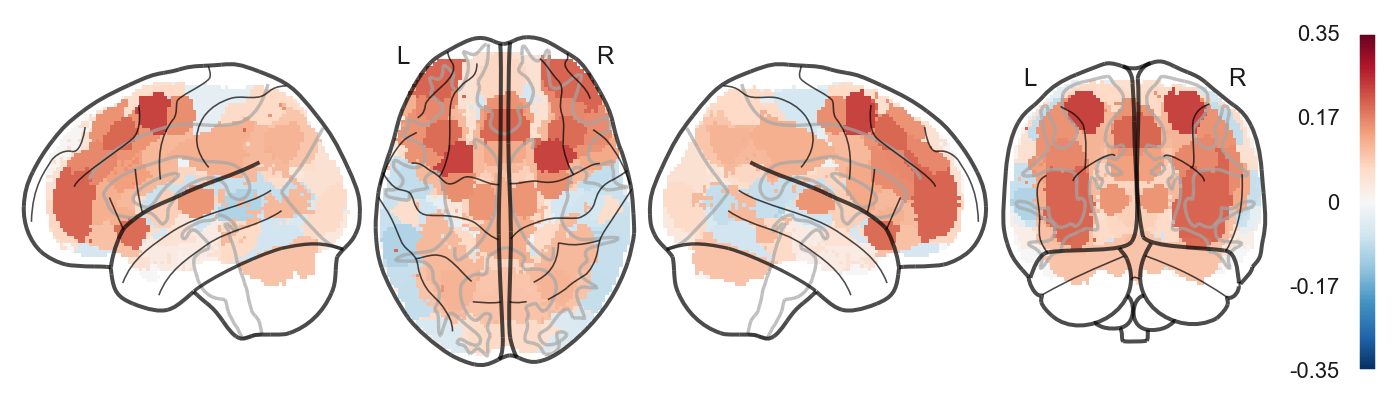

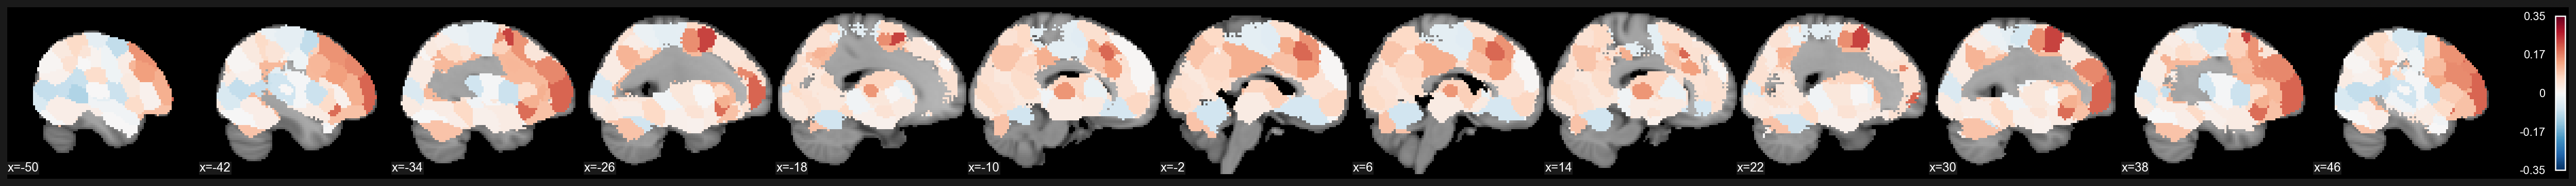

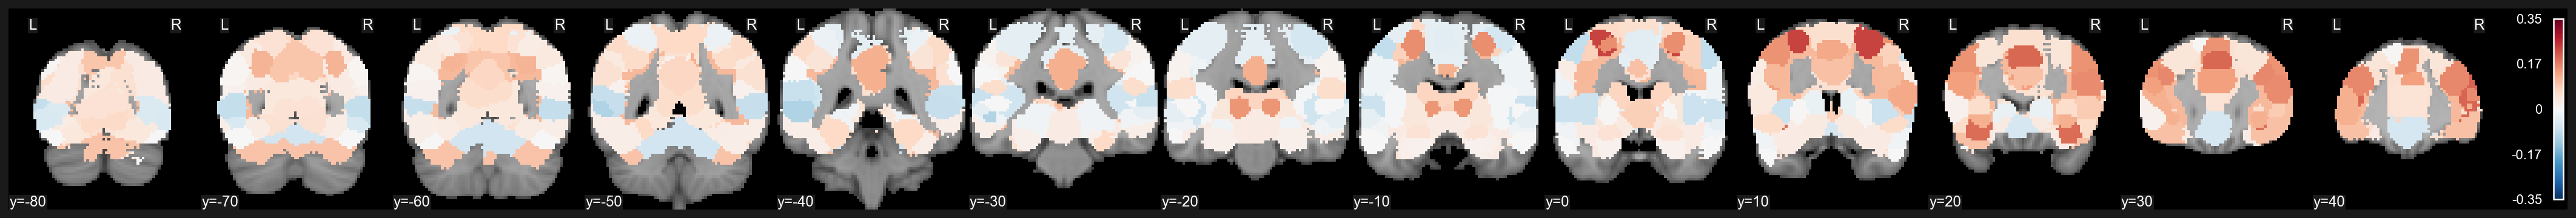

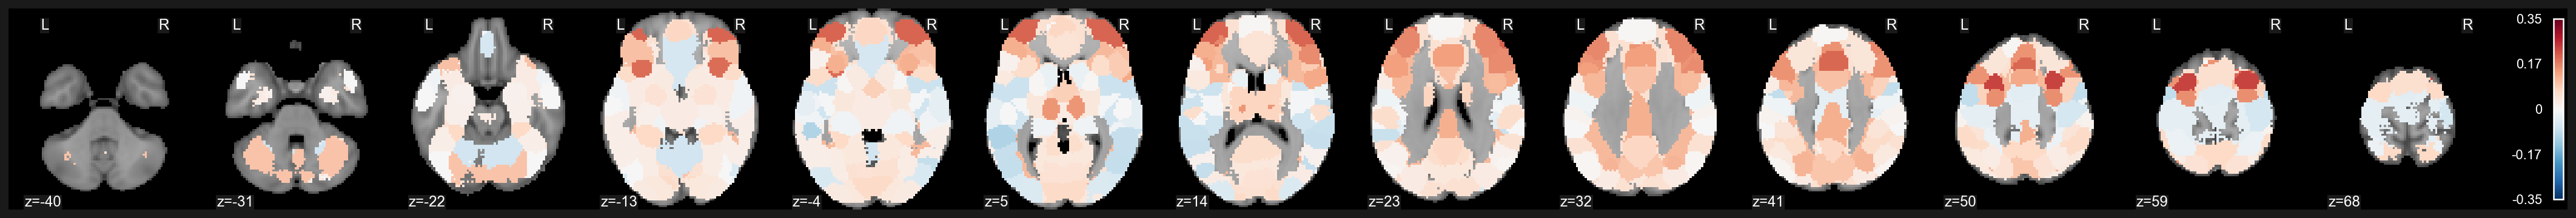

In [87]:
porn_control_all_cor_rvals = porn_control_cor_all_result['rvals'].values

porn_control_cor_matrix = mask100.copy()
porn_control_cor_matrix.data = np.array([x.data*y for (x,y) in zip(allmask100,porn_control_all_cor_rvals)])
porn_control_cor_matrix = porn_control_cor_matrix.sum()

plot_brain(porn_control_cor_matrix,**{'vmax':0.35})

In [88]:
# output brainmap
porn_control_cor_matrix.write(os.path.join(fpath,'brainmap','erotic_selfcontrol_isrsa_wholebrain.nii.gz'))

### Figure 6B

In [89]:
porn_control_cor_all_result = pd.read_csv(os.path.join(fpath,'results_new','porn_control_cor_threshold.csv'))

Plotting unthresholded image


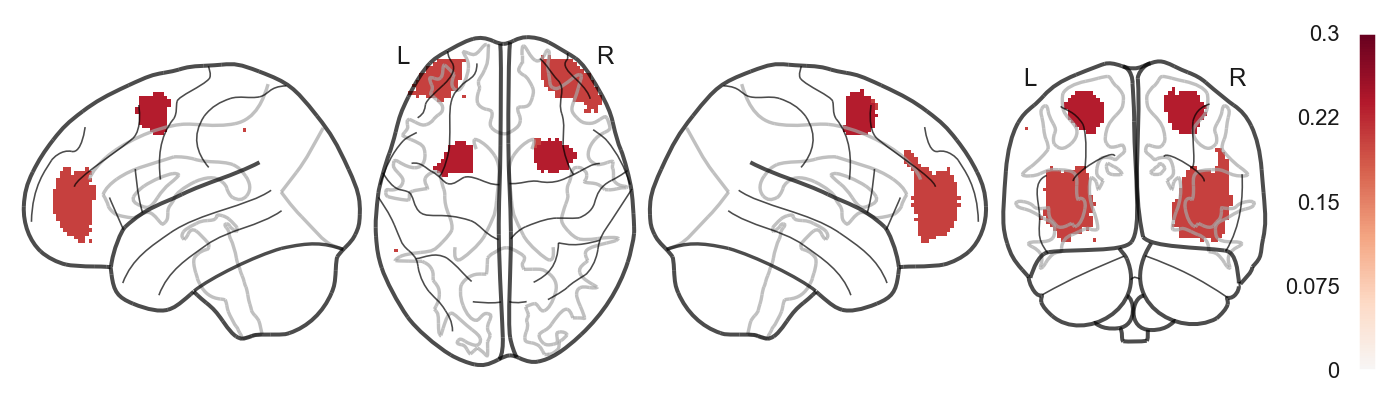

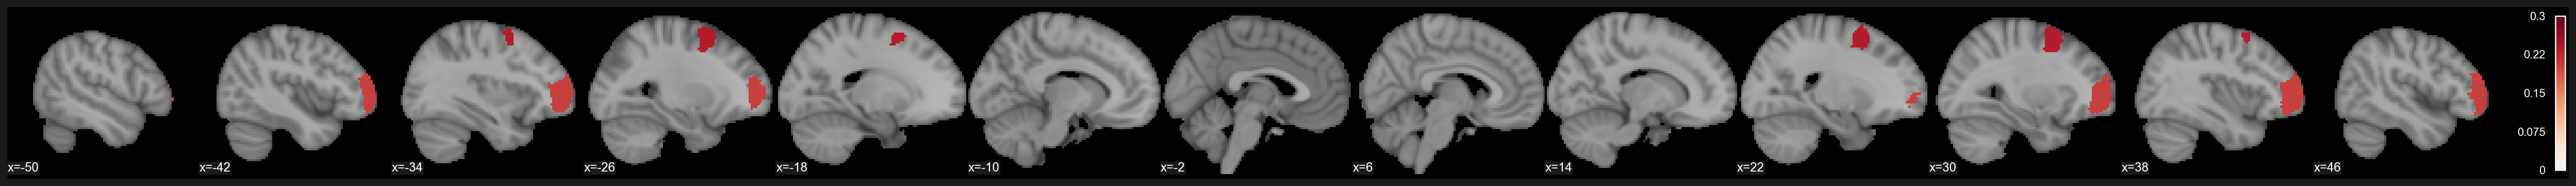

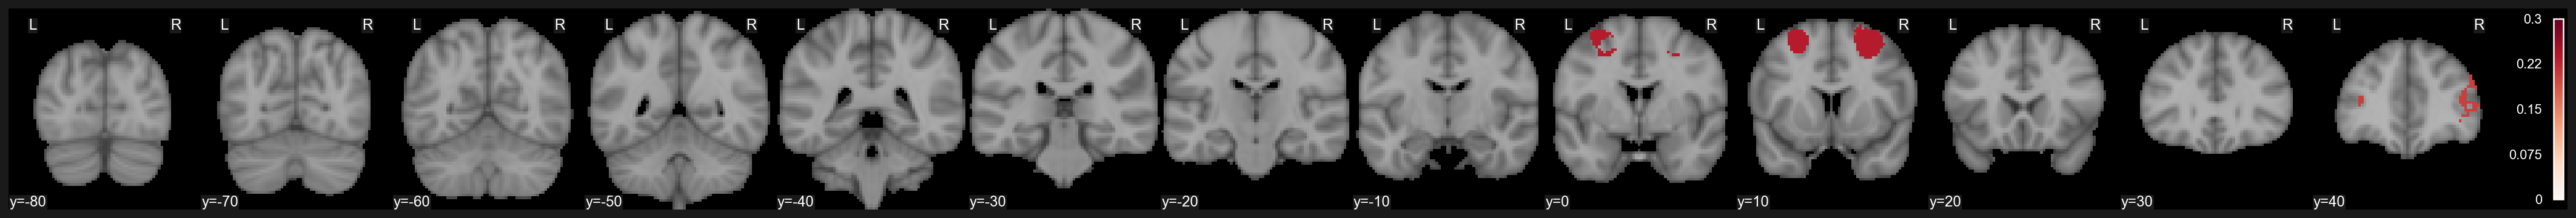

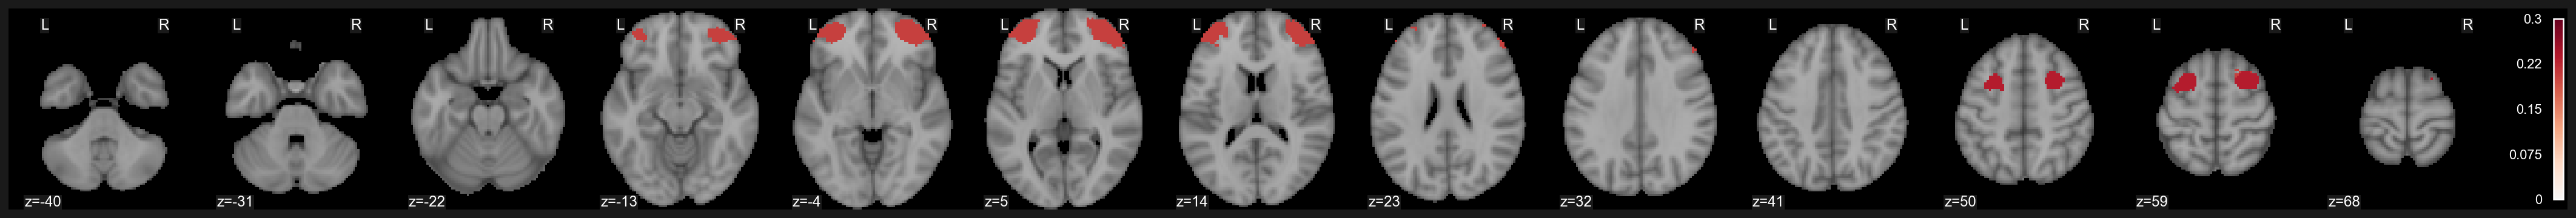

In [90]:
porn_control_all_cor_rvals_q05 = porn_control_cor_all_result['matrixpermute_rvals'].values

porn_control_cor_matrix_q05 = mask100.copy()
porn_control_cor_matrix_q05.data = np.array([x.data*y for (x,y) in zip(allmask100,porn_control_all_cor_rvals_q05)])
porn_control_cor_matrix_q05 = porn_control_cor_matrix_q05.sum()

plot_brain(porn_control_cor_matrix_q05,**{'vmax':0.30})

In [91]:
# output brainmap
porn_control_cor_matrix_q05.write(os.path.join(fpath,'brainmap','erotic_selfcontrol_isrsa_thresholded.nii.gz'))

### Figure 2C upper triangle
* in allmask100, ROI68 -> IFG 

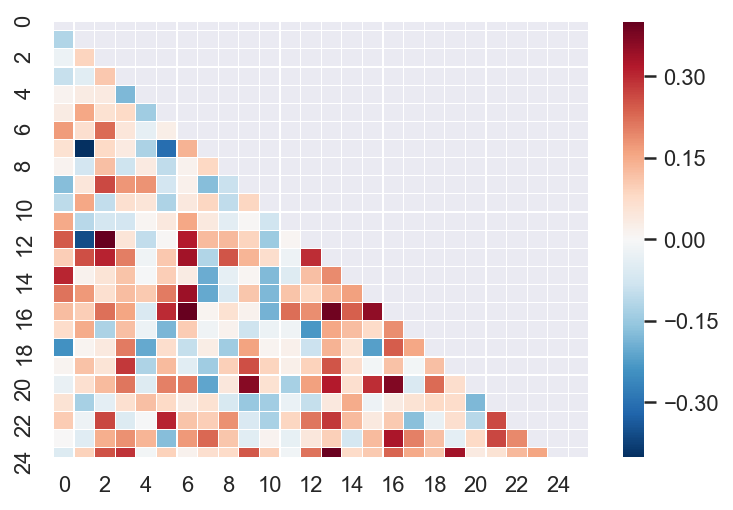

In [92]:
# plot IFG intersubject similarity
# porndata_100rois['ROI69'] = allmask[68]
porn_roi68 = distance.squareform(porndata_100rois['ROI69'])

mask =np.zeros_like(porn_roi68)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(porn_roi68, vmin=-0.4,vmax=0.4, mask=mask,linewidths=0.1,cmap = 'RdBu_r')

# ISRSA between neutral movie and sociosexual desire preference

In [97]:
neutraldata_100rois = pd.read_csv(os.path.join(fpath,'isc_new','neutral_100rois_isc_transpose_26subj.csv'))
neutraldata_100rois['desire_scale_normalize_cor'] = desire_scale_normalize_cor

## Mental test

In [ ]:
neutral_desire_normalize_r_cor_rvals100 = []
neutral_desire_normalize_r_cor_pvals100 = []

# in the 100rois_isc csv file, ROI number starts from 1
# in other files, ROI number starts from 0
for i in range(0,100):
    r = matrix_permutation(neutraldata_100rois['ROI'+str(i+1)],
        neutraldata_100rois['desire_scale_normalize_cor'],
        n_permute=10000, metric='spearman',tail=1, random_state=None)
    print("for ROI %s, the correlation is %s " % (i+1, r))
    neutral_desire_normalize_r_cor_rvals100.append(r['correlation'])
    neutral_desire_normalize_r_cor_pvals100.append(r['p'])

In [8]:
neutral_desire_rvals100_1tail = np.array(neutral_desire_normalize_r_cor_rvals100)
mask = neutral_desire_rvals100_1tail < 0
p = np.array(neutral_desire_normalize_r_cor_pvals100)
p[mask] = 1 - p[mask]

fdr(p,q=0.05)

-1

In [9]:
neutral_desire_normalize_r_cor_rvals100 = pd.DataFrame(neutral_desire_normalize_r_cor_rvals100)
neutral_desire_normalize_r_cor_rvals100.columns=['rvals']
neutral_desire_normalize_r_cor_rvals100.to_csv(os.path.join(fpath,'results_new'
                                                 ,'rvals100_neutral_desire_normalized_cor.csv'))

neutral_desire_normalize_r_cor_pvals100 = pd.DataFrame(neutral_desire_normalize_r_cor_pvals100)
neutral_desire_normalize_r_cor_pvals100.columns=['pvals']
neutral_desire_normalize_r_cor_pvals100.to_csv(os.path.join(fpath,'results_new',
                                                'pvals100_neutral_desire_normalized_cor.csv'))

### Figure 4B

In [99]:
neutral_desire_cor_all_result = pd.read_csv(os.path.join(fpath,'results_new','neutral_desire_cor_threshold.csv'))

Plotting unthresholded image


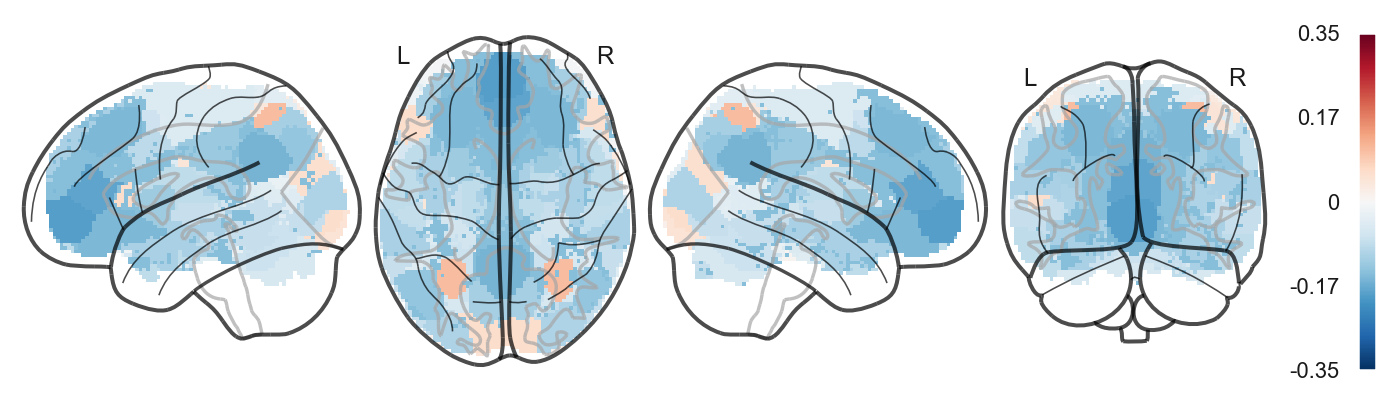

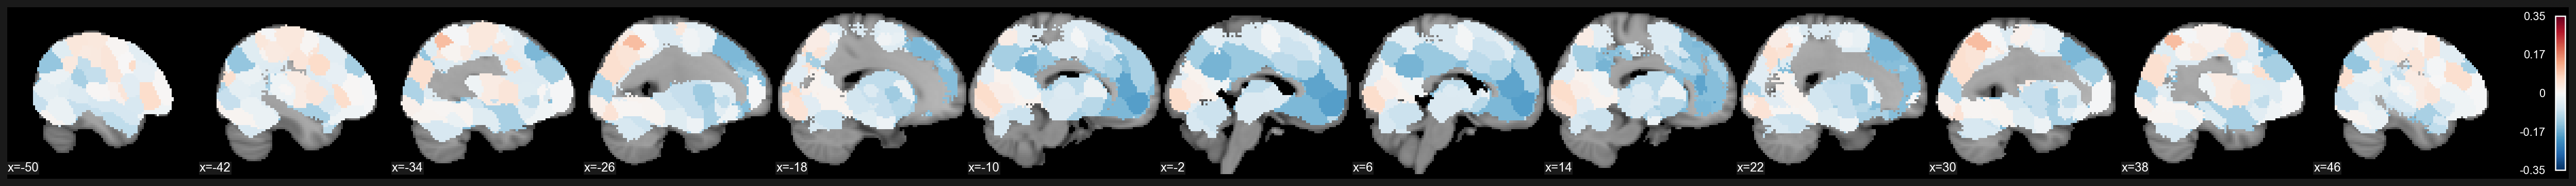

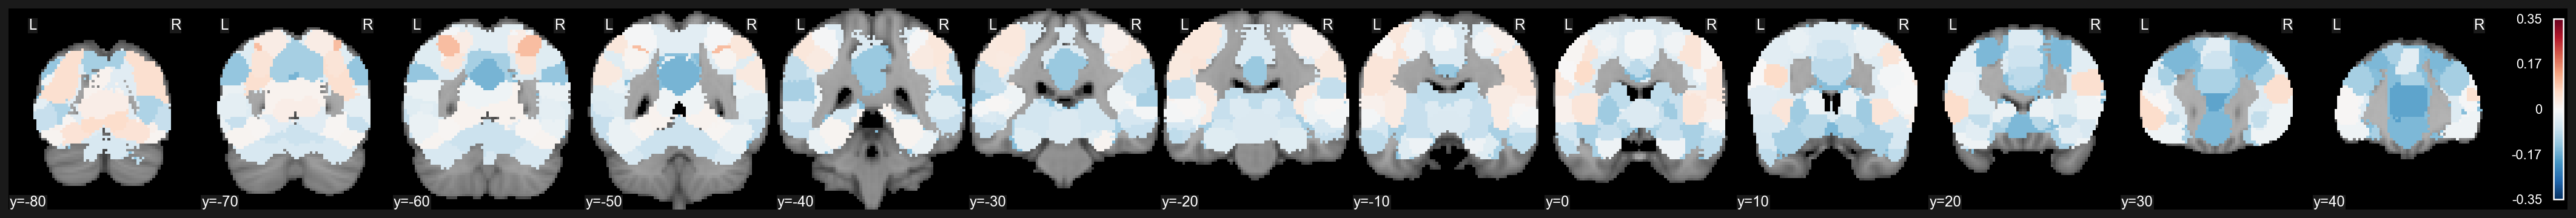

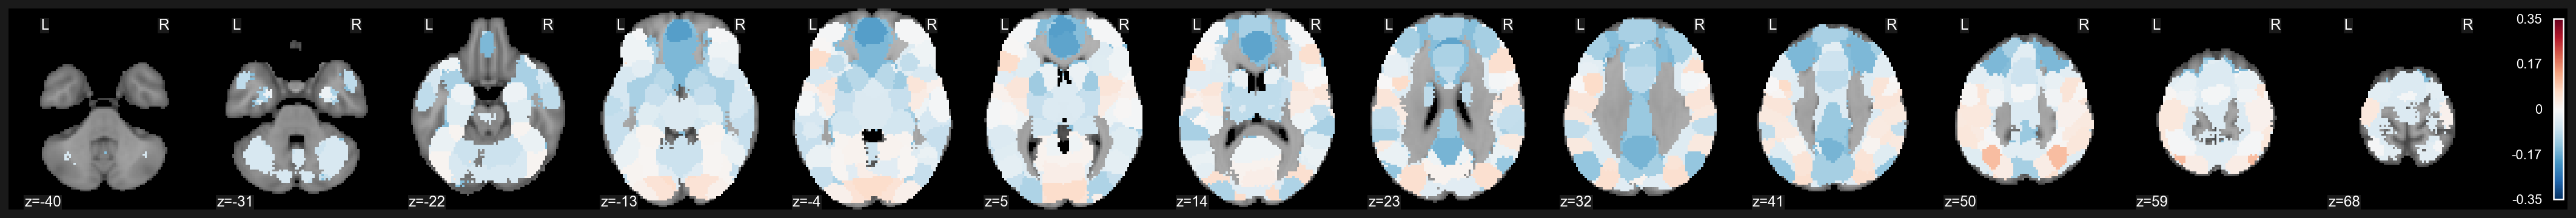

In [100]:
neutral_desire_all_cor_rvals = neutral_desire_cor_all_result['rvals'].values

neutral_desire_cor_matrix = mask100.copy()
neutral_desire_cor_matrix.data = np.array([x.data*y for (x,y) in zip(allmask100,neutral_desire_all_cor_rvals)])
neutral_desire_cor_matrix = neutral_desire_cor_matrix.sum()

plot_brain(neutral_desire_cor_matrix,**{'vmax':0.35})

In [101]:
# output brainmap
neutral_desire_cor_matrix.write(os.path.join(fpath,'brainmap','neutral_desire_isrsa_wholebrain.nii.gz'))

# ISRSA between neutral movie and self-control preference

In [102]:
neutraldata_100rois = pd.read_csv(os.path.join(fpath,'isc_new','neutral_100rois_isc_transpose_26subj.csv'))
neutraldata_100rois['control_short_gonogo_cor'] = control_short_gonogo_cor

## Mantel test

In [ ]:
neutral_gonogo_control_rvals100 = []
neutral_gonogo_control_pvals100 = []

# in the 100rois_isc csv file, ROI number starts from 1
# in other files, ROI number starts from 0
for i in range(0,100):
    r = matrix_permutation(neutraldata_100rois['ROI'+str(i+1)]
        ,neutraldata_100rois['control_short_gonogo_cor'],
        n_permute=10000, metric='spearman',tail=1, random_state=None)
    print("for ROI %s, the correlation is %s " % (i+1, r))
    neutral_gonogo_control_rvals100.append(r['correlation'])
    neutral_gonogo_control_pvals100.append(r['p'])

In [15]:
neutral_control_rvals100_1tail = np.array(neutral_gonogo_control_rvals100)
mask = neutral_control_rvals100_1tail < 0
p = np.array(neutral_gonogo_control_pvals100)
p[mask] = 1 - p[mask]

fdr(p,q=0.05)

-1

In [16]:
neutral_gonogo_control_rvals100_cor = pd.DataFrame(neutral_gonogo_control_rvals100)
neutral_gonogo_control_rvals100_cor.columns=['rvals']
neutral_gonogo_control_rvals100_cor.to_csv(os.path.join(fpath,'results_new'
                                                 ,'rvals100_neutral_control_normalized_cor.csv'))

neutral_gonogo_control_pvals100_cor = pd.DataFrame(neutral_gonogo_control_pvals100)
neutral_gonogo_control_pvals100_cor.columns=['pvals']
neutral_gonogo_control_pvals100_cor.to_csv(os.path.join(fpath,'results_new',
                                                'pvals100_neutral_control_normalized_cor.csv'))

### Figure 4D

In [104]:
neutral_control_cor_all_result = pd.read_csv(os.path.join(fpath,'results_new','neutral_control_cor_threshold.csv'))

Plotting unthresholded image


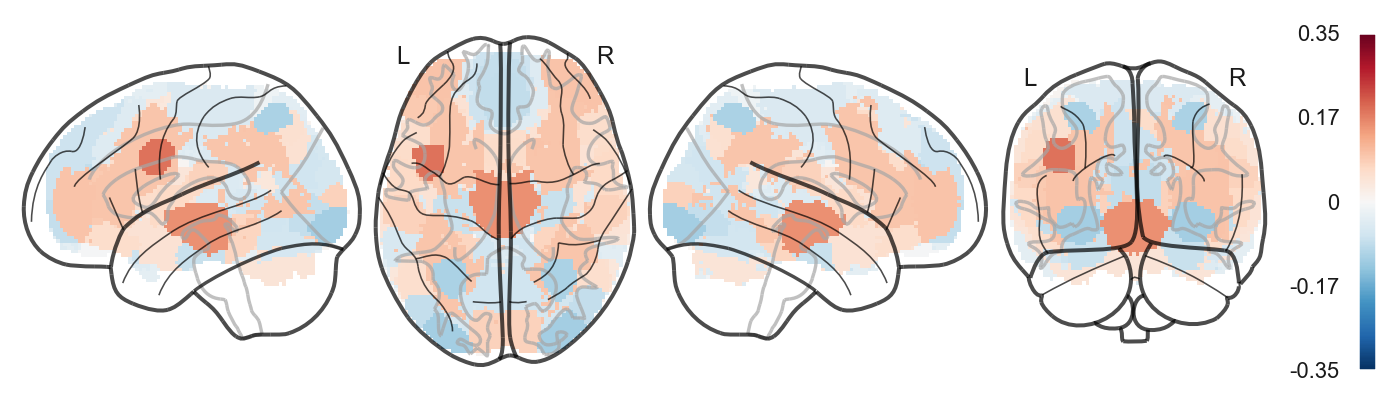

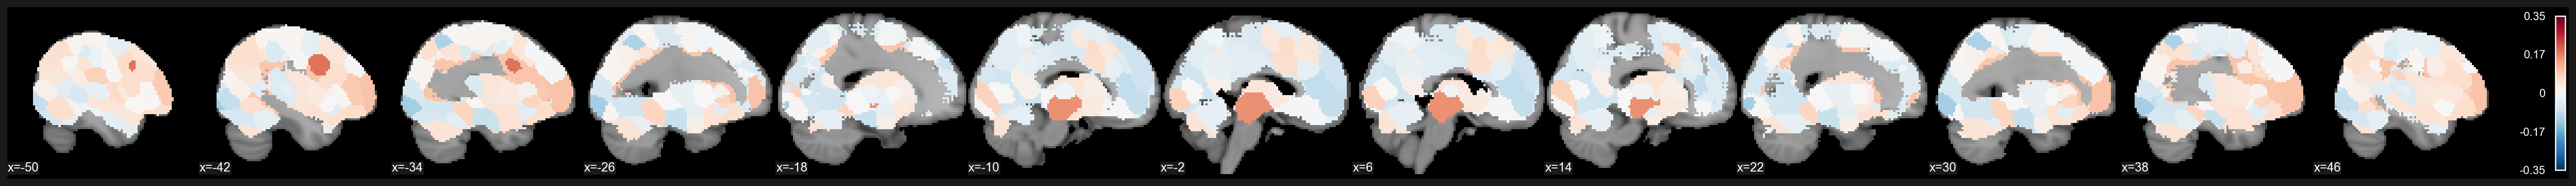

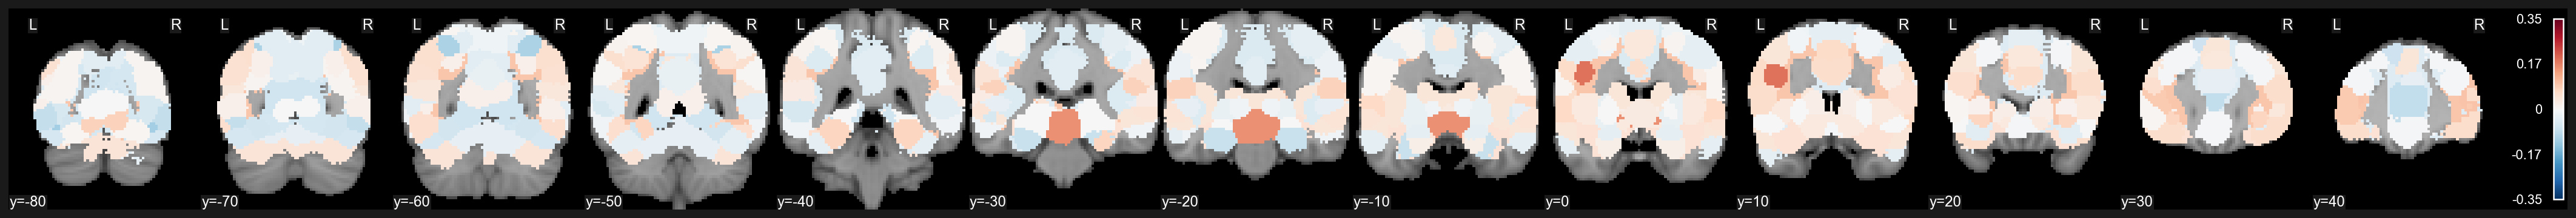

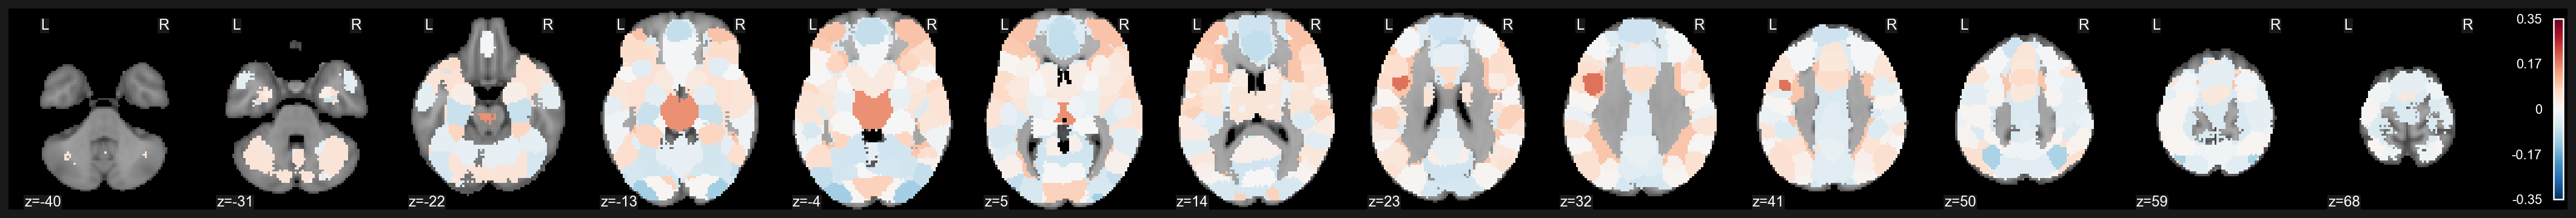

In [105]:
neutral_control_all_cor_rvals = neutral_control_cor_all_result['rvals'].values

neutral_control_cor_matrix = mask100.copy()
neutral_control_cor_matrix.data = np.array([x.data*y for (x,y) in zip(allmask100,neutral_control_all_cor_rvals)])
neutral_control_cor_matrix = neutral_control_cor_matrix.sum()

plot_brain(neutral_control_cor_matrix,**{'vmax':0.35})

In [106]:
# output brainmap
neutral_control_cor_matrix.write(os.path.join(fpath,'brainmap','neutral_control_isrsa_wholebrain.nii.gz'))

# ISRSA between erotic movie and desire summary score euclidean distance

In [111]:
porndata_100rois_sim = pd.read_csv(os.path.join(fpath,'isc_new','porn_100rois_isc_transpose_26subj.csv'))
porndata_100rois_absdist = 1-porndata_100rois_sim

In [114]:
porndata_100rois_absdist['desire_absdist'] = desire_sum_absdist

In [ ]:
porn_desire_absdist_corpermute_rvals100 = []
porn_desire_absdist_corpermute_pvals100 = []
for i in range(0,100):
    r = matrix_permutation(porndata_100rois_absdist['ROI'+str(i+1)],porndata_100rois_absdist['desire_absdist'],
        n_permute=10000, metric='spearman',tail=1, random_state=None, n_jobs=5)
    print("for ROI %s, the correlation is %s " % (i+1, r))
    porn_desire_absdist_corpermute_rvals100.append(r['correlation'])
    porn_desire_absdist_corpermute_pvals100.append(r['p'])

### Figure S1A

In [ ]:
porn_desire_absdist = porn_desire_absdist_corpermute_rvals100

porn_desire_absdist_all = mask100.copy()
porn_desire_absdist_all.data = np.array([x.data*y for (x,y) in zip(allmask100,porn_desire_absdist)])
porn_desire_absdist_all = porn_desire_absdist_all.sum()

Plotting unthresholded image


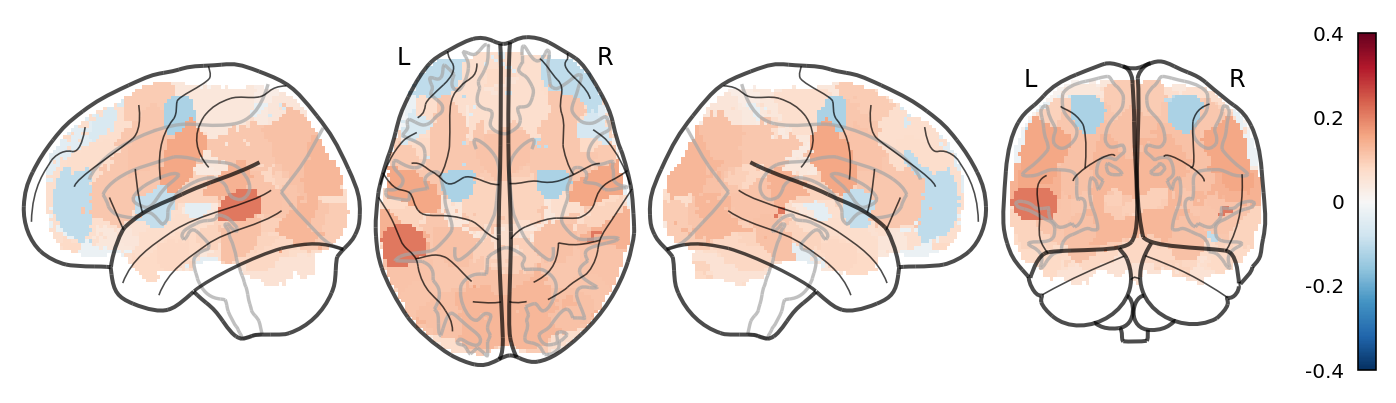

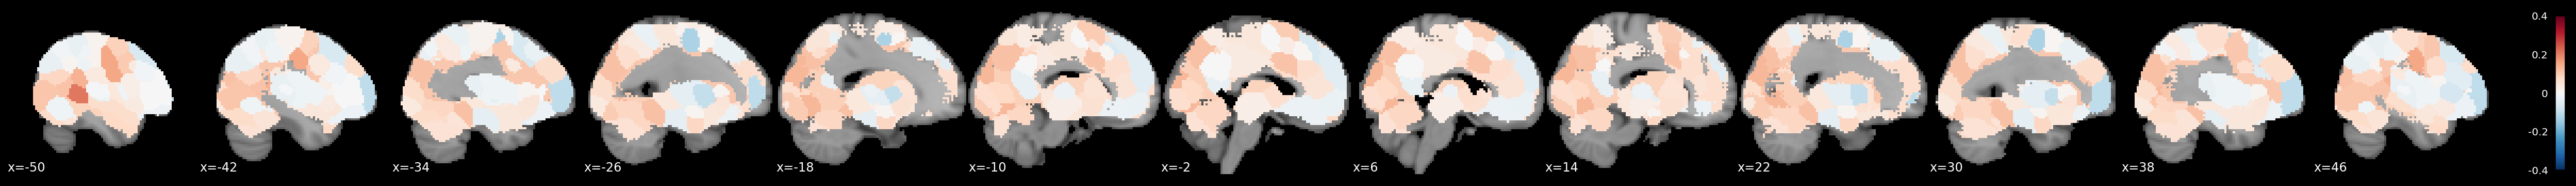

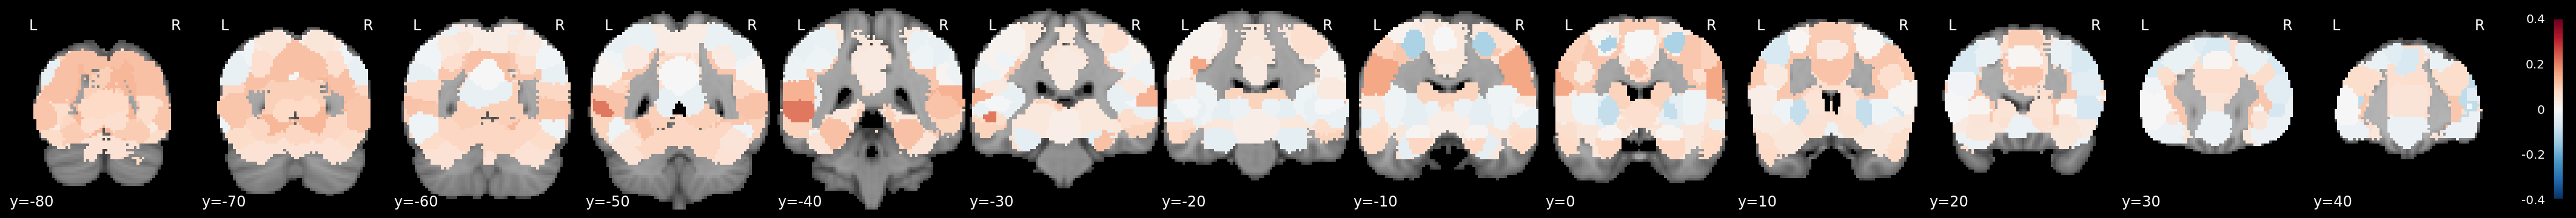

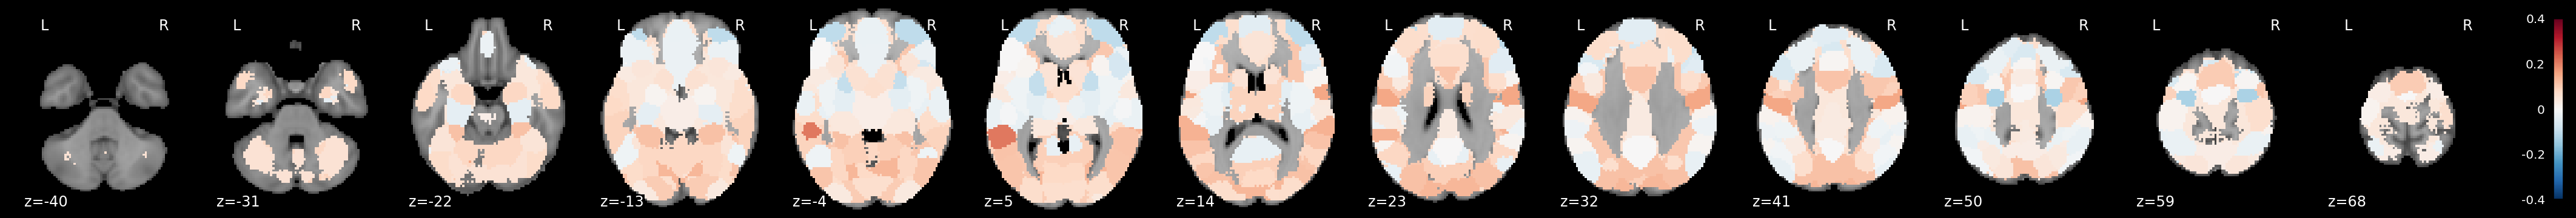

In [25]:
plot_brain(porn_desire_absdist_all,**{'vmax':0.40})

# ISRSA between erotic movie and self-control summary score euclidean distance

In [117]:
porndata_100rois_absdist['control_absdist'] = control_sum_absdist

In [ ]:
porn_control_absdist_corpermute_rvals100 = []
porn_control_absdist_corpermute_pvals100 = []
for i in range(0,100):
    r = matrix_permutation(porndata_100rois_absdist['ROI'+str(i+1)],porndata_100rois_absdist['control_absdist'],
        n_permute=10000, metric='spearman',tail=1, random_state=None, n_jobs=5)
    print("for ROI %s, the correlation is %s " % (i+1, r))
    porn_control_absdist_corpermute_rvals100.append(r['correlation'])
    porn_control_absdist_corpermute_pvals100.append(r['p'])

### Figure S1B

In [ ]:
porn_control_absdist = porn_control_absdist_corpermute_rvals100

porn_control_absdist_all = mask100.copy()
porn_control_absdist_all.data = np.array([x.data*y for (x,y) in zip(allmask100,porn_control_absdist)])
porn_control_absdist_all = porn_control_absdist_all.sum()

Plotting unthresholded image


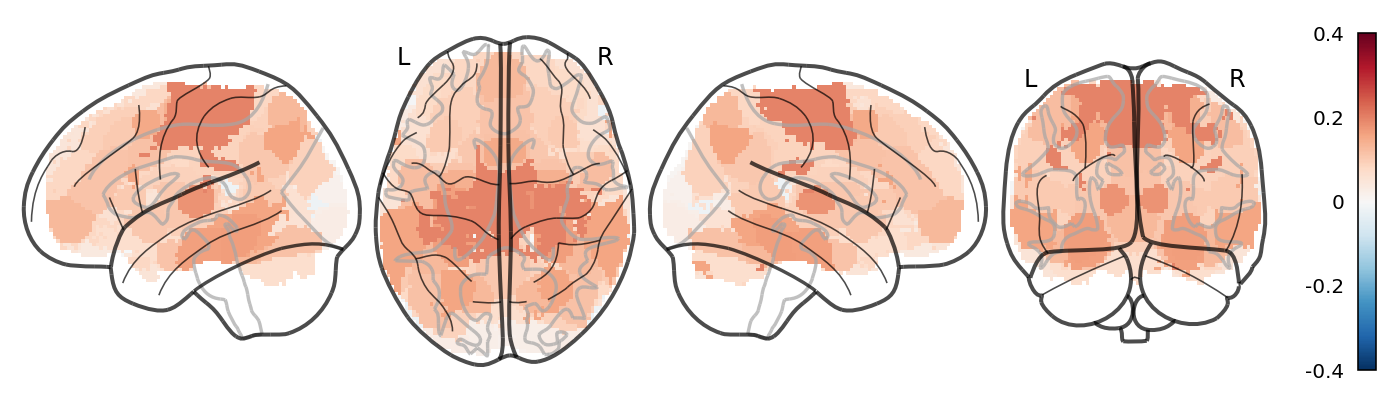

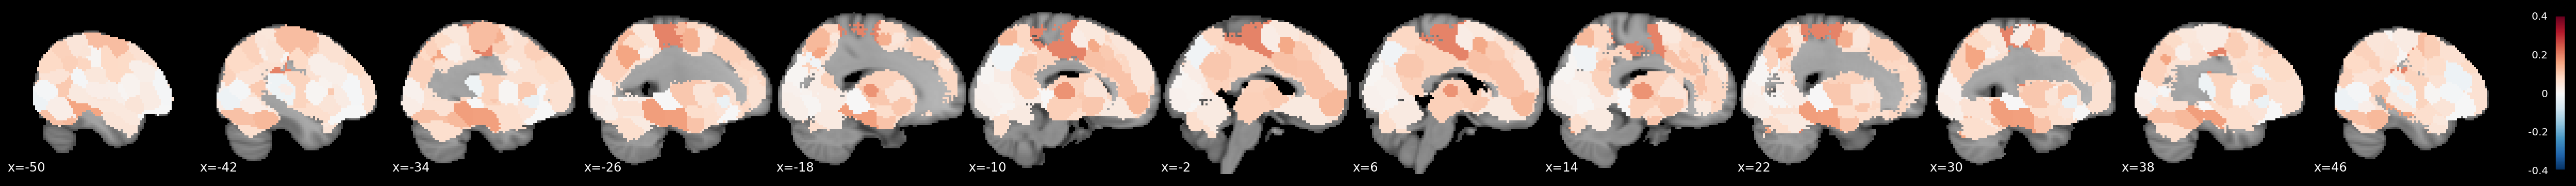

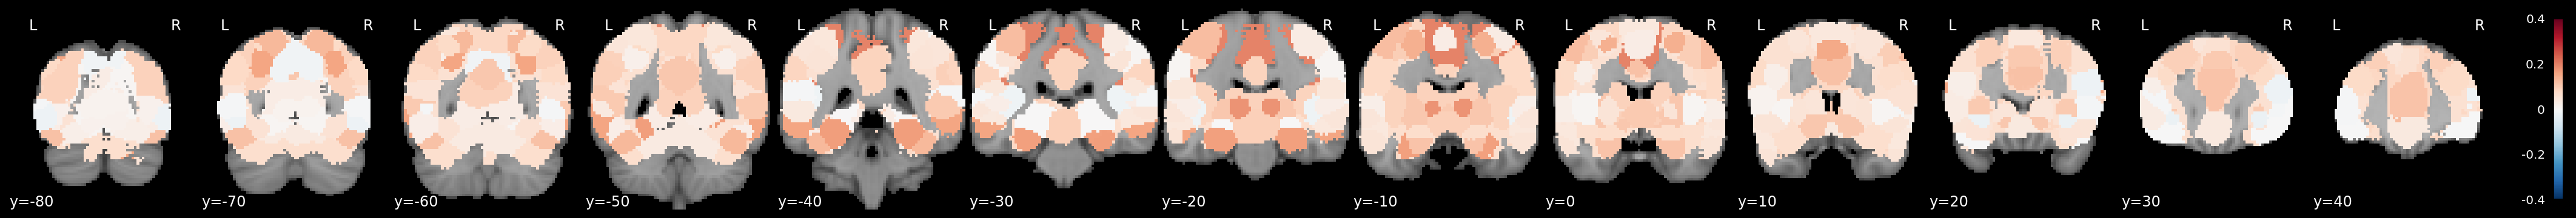

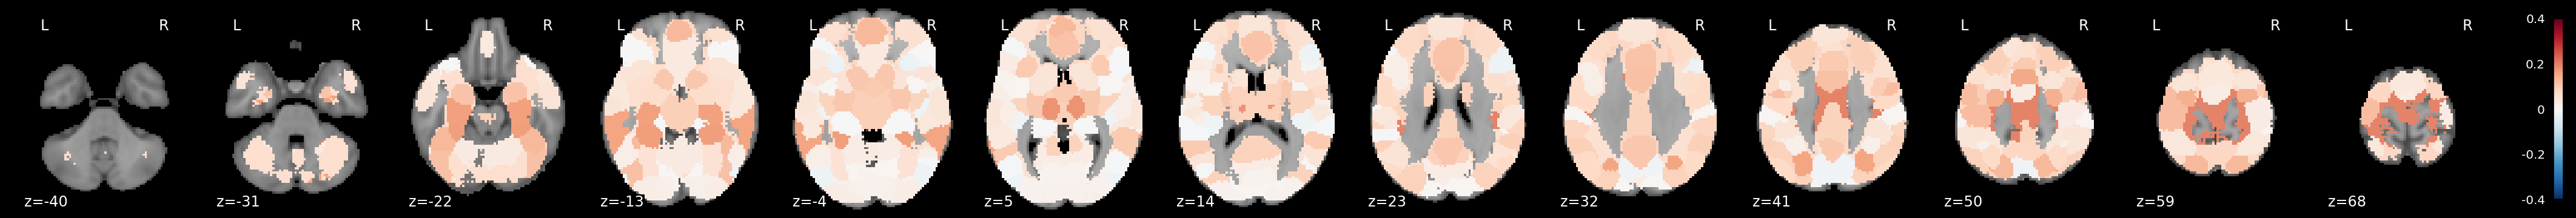

In [24]:
plot_brain(porn_control_absdist_all,**{'vmax':0.40})